# Project for Tinkoff Generation ex.№7 by Malakhov Aleksey

In [233]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.utils import shuffle,resample
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score


matplotlib.style.use('ggplot')
%matplotlib inline

In [234]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/credit-card-buyers/test data credit card.csv
/kaggle/input/credit-card-buyers/train data credit card.csv


In [235]:
df_train = pd.read_csv('/kaggle/input/credit-card-buyers/train data credit card.csv',index_col = ['ID'])
df_train

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
ID,,,,,,,,,,
NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...
BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,NaN,1925586,No,0
HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0


In [236]:
df_train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

# Exploratory Data Analysis

In [237]:
df_train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [238]:
df_train.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Age                    0.618992
Vintage                0.790189
Avg_Account_Balance    2.968727
Is_Lead                1.235596
dtype: float64

In [239]:
df_train.shape

(245725, 10)

In [240]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 245725 entries, NNVBBKZB to BOCZSWLJ
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               245725 non-null  object
 1   Age                  245725 non-null  int64 
 2   Region_Code          245725 non-null  object
 3   Occupation           245725 non-null  object
 4   Channel_Code         245725 non-null  object
 5   Vintage              245725 non-null  int64 
 6   Credit_Product       216400 non-null  object
 7   Avg_Account_Balance  245725 non-null  int64 
 8   Is_Active            245725 non-null  object
 9   Is_Lead              245725 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 20.6+ MB


In [241]:
df_train.isnull().sum()

Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [242]:
df_train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [243]:
df_train['Is_Active'].value_counts()

No     150290
Yes     95435
Name: Is_Active, dtype: int64

In [244]:
df_train['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

In [245]:
df_train['Region_Code'].value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [246]:
df_train['Region_Code'].value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [247]:
df_train['Channel_Code'].value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [248]:
df_train.groupby(by = ['Gender'])['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,111528.0,41.382639,14.690880,23.0,29.0,37.0,51.0,85.0
Male,134197.0,45.912114,14.627364,24.0,32.0,46.0,56.0,85.0


In [249]:
df_train.groupby(by = ['Is_Lead'])['Gender'].value_counts()

Is_Lead  Gender
0        Male      98614
         Female    88823
1        Male      35583
         Female    22705
Name: Gender, dtype: int64

In [250]:
df_train.groupby(by = ['Is_Lead','Gender'])['Age'].describe()

count       mean        std   min   25%   50%   75%   max
Is_Lead Gender                                                             
0       Female  88823.0  39.604461  14.495572  23.0  28.0  33.0  49.0  85.0
        Male    98614.0  44.058217  14.897954  24.0  30.0  43.0  54.0  85.0
1       Female  22705.0  48.338956  13.318018  24.0  40.0  48.0  55.0  85.0
        Male    35583.0  51.049968  12.486014  24.0  44.0  50.0  58.0  85.0

In [251]:
df_train.groupby(by = ['Is_Lead','Gender'])['Avg_Account_Balance'].describe()

count          mean            std      min        25%  \
Is_Lead Gender                                                             
0       Female  88823.0  1.078816e+06  835869.123007  45657.0  575664.50   
        Male    98614.0  1.124817e+06  856788.082623  20790.0  601170.25   
1       Female  22705.0  1.219091e+06  877074.080962  83179.0  656588.00   
        Male    35583.0  1.204255e+06  858743.679465  45950.0  662444.00   

                     50%         75%         max  
Is_Lead Gender                                    
0       Female  845170.0  1299466.00   9546317.0  
        Male    890738.0  1356926.75  10352009.0  
1       Female  983832.0  1500815.00   8924773.0  
        Male    980050.0  1472683.00  10007678.0

In [252]:
df_train.groupby(by = ['Is_Lead','Gender'])['Is_Active'].value_counts()

Is_Lead  Gender  Is_Active
0        Female  No           59454
                 Yes          29369
         Male    No           59553
                 Yes          39061
1        Female  No           12587
                 Yes          10118
         Male    No           18696
                 Yes          16887
Name: Is_Active, dtype: int64

In [253]:
df_train.groupby(by = ['Is_Lead'])['Is_Active'].value_counts()

Is_Lead  Is_Active
0        No           119007
         Yes           68430
1        No            31283
         Yes           27005
Name: Is_Active, dtype: int64

In [254]:
df_train.groupby(by = ['Is_Lead','Gender'])['Age'].describe()

count       mean        std   min   25%   50%   75%   max
Is_Lead Gender                                                             
0       Female  88823.0  39.604461  14.495572  23.0  28.0  33.0  49.0  85.0
        Male    98614.0  44.058217  14.897954  24.0  30.0  43.0  54.0  85.0
1       Female  22705.0  48.338956  13.318018  24.0  40.0  48.0  55.0  85.0
        Male    35583.0  51.049968  12.486014  24.0  44.0  50.0  58.0  85.0

# Data Visualization

In [255]:
class visualize:
    def __init__(self,dataframe=None,columns=None):
        self.dataframe = dataframe
        self.columns = columns
    def boxplot(self):
        for col in list(columns):
            sns.boxplot(x=self.dataframe[col])
            plt.title(col,fontsize = 15,color = 'red')
            plt.show()
    def countplot(self):
        for col in list(columns):
            sns.countplot(x=self.dataframe[col])
            plt.title(col,fontsize = 15,color = 'red')
            plt.show()
    def histplot(self):
        for col in list(columns):
            self.dataframe[col].hist()
            plt.title(col,fontsize = 15,color = 'red')
            plt.show()
    def cfm(self,y_true,predict_x):
        self.y_true = y_true
        self.predict_x = predict_x
        cfm = confusion_matrix(y_true, predict_x)
        group_names = ['TN', 'FP', 'FN', 'TP']
        group_percentages = [
            '{0:.4%}'.format(value)
            for value in cfm.flatten() / np.sum(cfm)
        ]
        labels = [
            f"{v2}\n{v3}"
            for v2, v3 in zip(group_names, group_percentages)
        ]
        labels = np.asarray(labels).reshape(2, 2)
        sns.heatmap(cfm, annot=labels,fmt = '')
        plt.show()

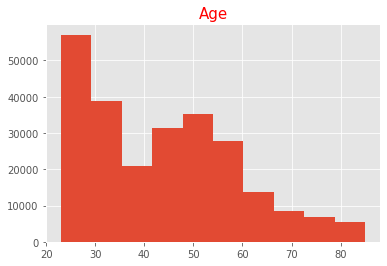

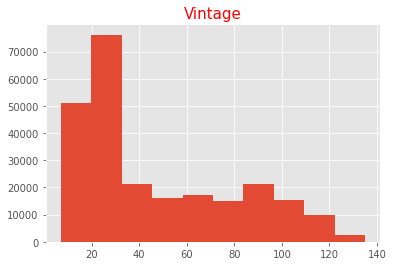

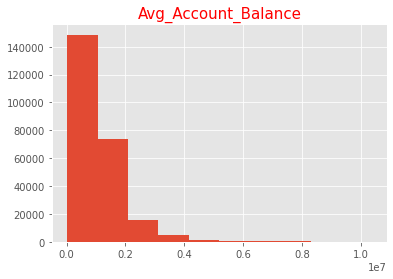

In [256]:
columns = ['Age','Vintage','Avg_Account_Balance']
visualize(df_train,columns).histplot()

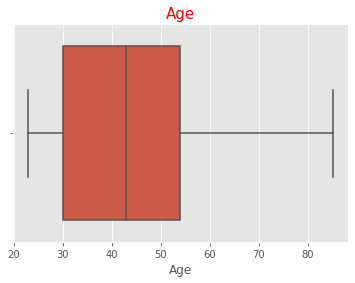

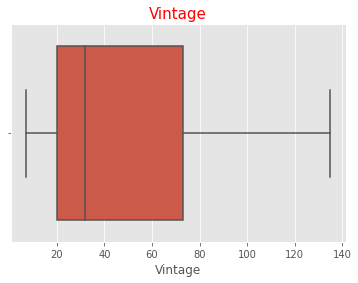

In [257]:
columns = ['Age','Vintage']
visualize(df_train,columns).boxplot()

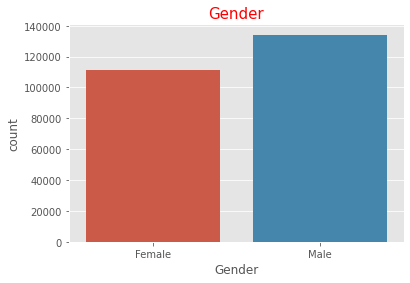

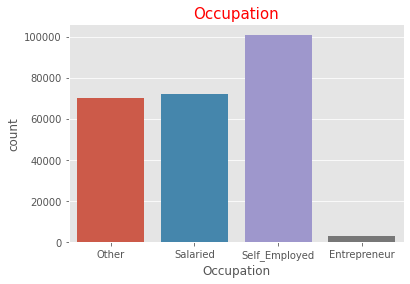

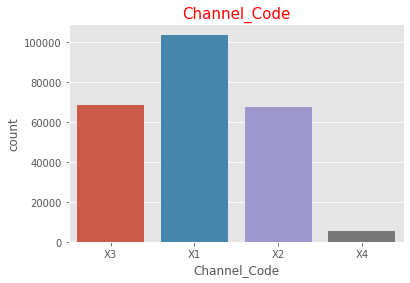

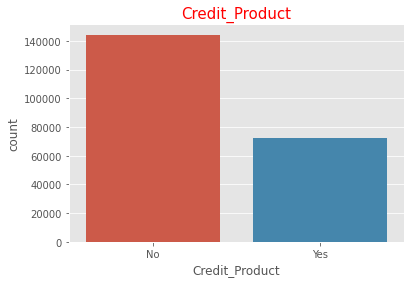

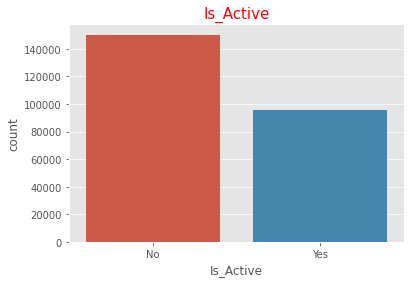

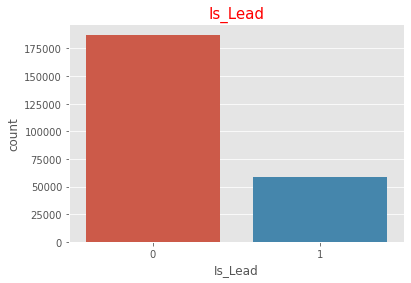

In [258]:
columns = ['Gender','Occupation','Channel_Code','Credit_Product','Is_Active','Is_Lead']
visualize(df_train,columns).countplot()

<AxesSubplot:>

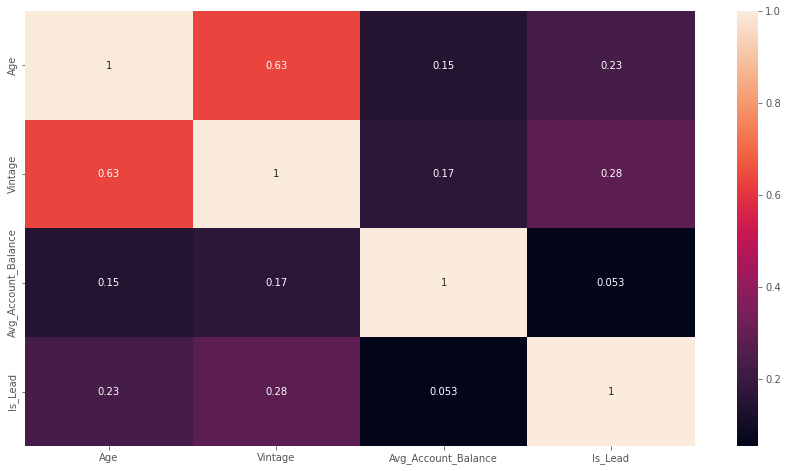

In [259]:
plt.figure(figsize = (15,8))
sns.heatmap(df_train.corr(),annot = True)

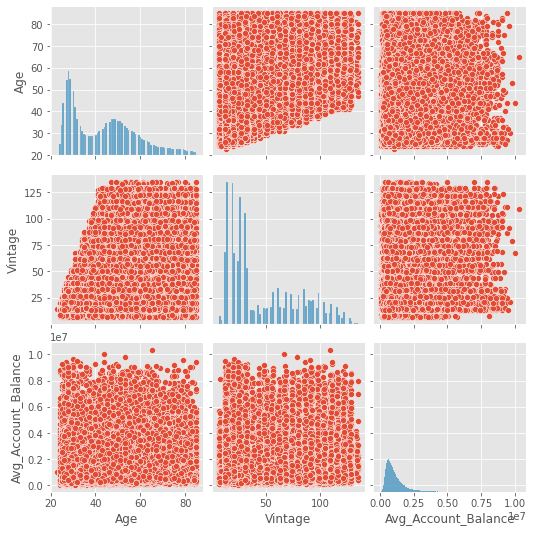

In [260]:
sns.pairplot(df_train.drop(['Is_Lead'],axis = 1),kind = 'scatter')

<AxesSubplot:>

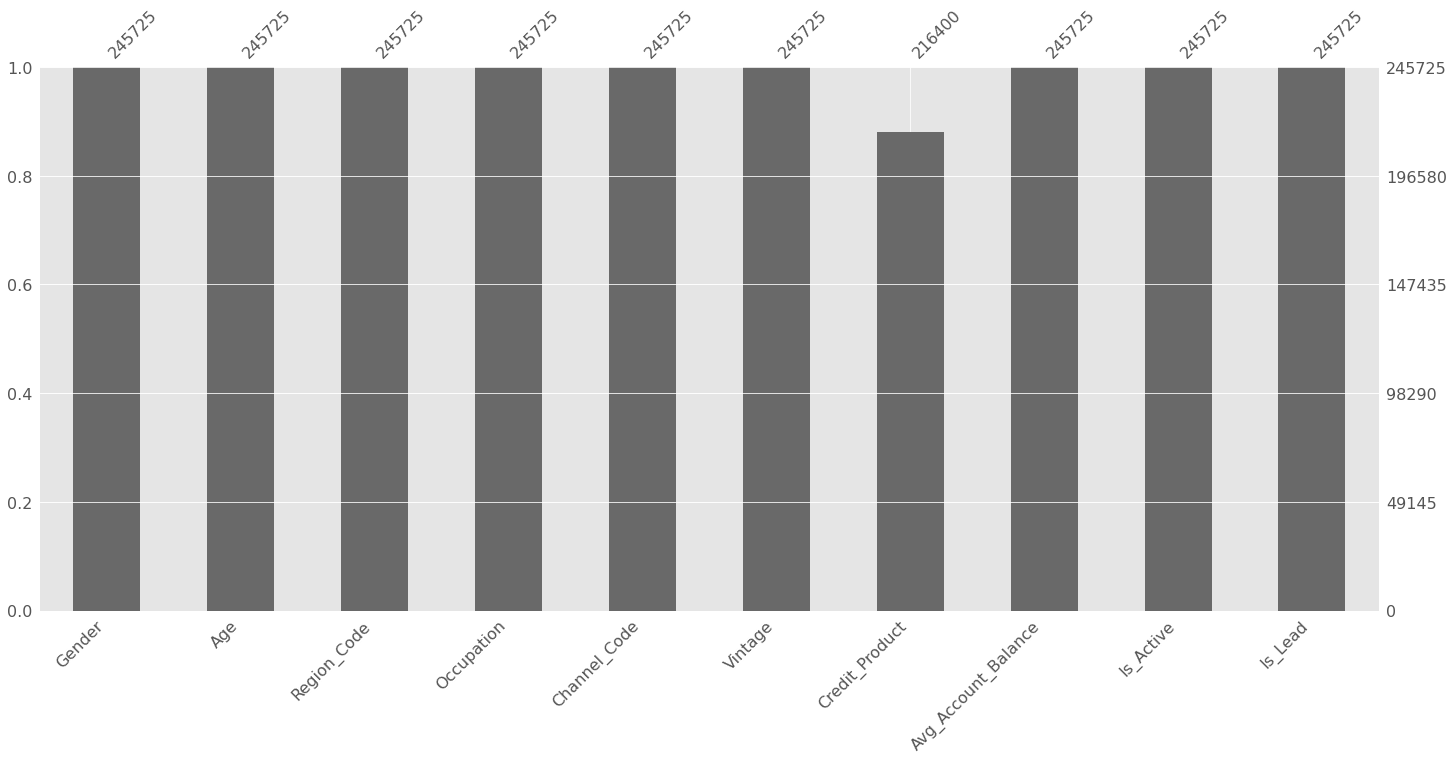

In [261]:
msno.bar(df_train)

In [262]:
male_df = df_train[df_train['Gender']=='Male']
female_df = df_train[df_train['Gender']=='Female']

In [263]:
male_df['Credit_Product'].value_counts()

No     74181
Yes    41738
Name: Credit_Product, dtype: int64

In [264]:
female_df['Credit_Product'].value_counts()

No     70176
Yes    30305
Name: Credit_Product, dtype: int64

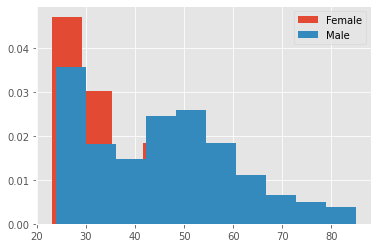

In [265]:
female_df['Age'].hist(density = 1,label = 'Female')
male_df['Age'].hist(density = 1,label = 'Male')
plt.legend(loc="upper right")

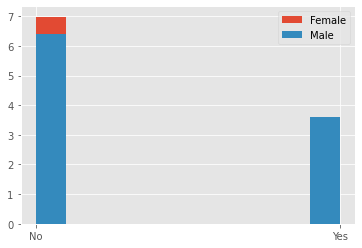

In [266]:
female_df['Credit_Product'].hist(density = 1,label = 'Female')
male_df['Credit_Product'].hist(density = 1,label = 'Male')
plt.legend(loc="upper right")

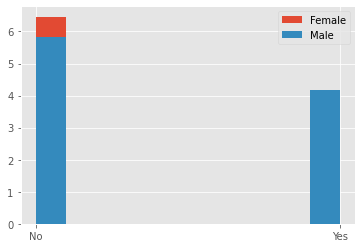

In [267]:
female_df['Is_Active'].hist(density = 1,label = 'Female')
male_df['Is_Active'].hist(density = 1,label = 'Male')
plt.legend(loc="upper right")

<AxesSubplot:>

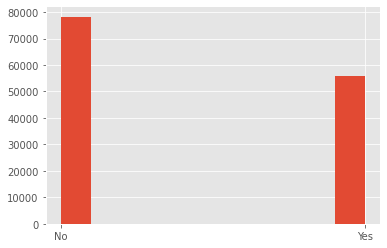

In [268]:
male_df['Is_Active'].hist()

Text(0.5, 0, 'Age')

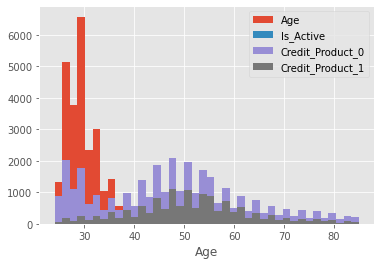

In [269]:
male_df.groupby(by = ['Is_Active','Credit_Product'])['Age'].hist(bins = 40)
plt.legend(labels = ['Age','Is_Active','Credit_Product_0','Credit_Product_1'])
plt.xlabel('Age')

Text(0.5, 0, 'Age')

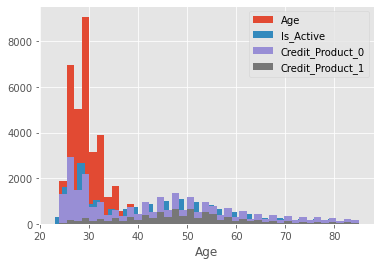

In [270]:
female_df.groupby(by = ['Is_Active','Credit_Product'])['Age'].hist(bins = 40)
plt.legend(labels = ['Age','Is_Active','Credit_Product_0','Credit_Product_1'])
plt.xlabel('Age')

# Hypothesis: Men over 45 years prefer to use credit cards and similar credit products more than others
## To prove that,we need to fill missing values in Credit_Product

# Prepairing Data

In [271]:
def replace_binary(dataframe,df_column,False_value,True_value):
    dict = {False_value:0,True_value:1}
    dataframe[df_column] = dataframe[df_column].map(dict)

In [272]:
df_train['Region_Code'] = df_train['Region_Code'].apply(lambda x: str(x)[3:5])

In [273]:
replace_binary(df_train,'Is_Active','No','Yes')
replace_binary(df_train,'Credit_Product','No','Yes')

In [274]:
replace_binary(df_train,'Gender','Female','Male')

In [275]:
df_train = df_train.rename({'Gender':'Is_Male'},axis = 1)

In [276]:
df_train = pd.get_dummies(data=df_train, columns=['Occupation','Channel_Code'])
df_train

,Is_Male,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
ID,,,,,,,,,,,,,,,,
NNVBBKZB,0,73,68,43,0.0,1045696,0,0,0,1,0,0,0,0,1,0
IDD62UNG,0,30,77,32,0.0,581988,0,0,0,0,1,0,1,0,0,0
HD3DSEMC,0,56,68,26,0.0,1484315,1,0,0,0,0,1,0,0,1,0
BF3NC7KV,1,34,70,19,0.0,470454,0,0,0,0,1,0,1,0,0,0
TEASRWXV,0,30,82,33,0.0,886787,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BPAWWXZN,1,51,84,109,NaN,1925586,0,0,0,0,0,1,0,0,1,0
HFNB7JY8,1,27,68,15,0.0,862952,1,0,0,0,1,0,1,0,0,0
GEHAUCWT,0,26,81,13,0.0,670659,0,0,0,0,1,0,1,0,0,0


# Filling the missing values

In [277]:
df_train.isnull().sum()

Is_Male                         0
Age                             0
Region_Code                     0
Vintage                         0
Credit_Product              29325
Avg_Account_Balance             0
Is_Active                       0
Is_Lead                         0
Occupation_Entrepreneur         0
Occupation_Other                0
Occupation_Salaried             0
Occupation_Self_Employed        0
Channel_Code_X1                 0
Channel_Code_X2                 0
Channel_Code_X3                 0
Channel_Code_X4                 0
dtype: int64

In [278]:
df_train['Credit_Product'].value_counts()

0.0    144357
1.0     72043
Name: Credit_Product, dtype: int64

In [279]:
df_train['Credit_Product'] = df_train['Credit_Product'].fillna(-9999)
df_train

,Is_Male,Age,Region_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
ID,,,,,,,,,,,,,,,,
NNVBBKZB,0,73,68,43,0.0,1045696,0,0,0,1,0,0,0,0,1,0
IDD62UNG,0,30,77,32,0.0,581988,0,0,0,0,1,0,1,0,0,0
HD3DSEMC,0,56,68,26,0.0,1484315,1,0,0,0,0,1,0,0,1,0
BF3NC7KV,1,34,70,19,0.0,470454,0,0,0,0,1,0,1,0,0,0
TEASRWXV,0,30,82,33,0.0,886787,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BPAWWXZN,1,51,84,109,-9999.0,1925586,0,0,0,0,0,1,0,0,1,0
HFNB7JY8,1,27,68,15,0.0,862952,1,0,0,0,1,0,1,0,0,0
GEHAUCWT,0,26,81,13,0.0,670659,0,0,0,0,1,0,1,0,0,0


In [280]:
y = df_train['Is_Lead']

In [281]:
X_credit = df_train[df_train['Credit_Product'] != -9999].drop(['Credit_Product','Is_Lead'],axis = 1)
y_credit = df_train[df_train['Credit_Product'] != -9999]['Credit_Product']

In [282]:
X_credit_train , X_credit_val , y_credit_train, y_credit_val = train_test_split(X_credit,y_credit,test_size = 0.2,random_state = 42)

In [283]:
X_credit_train

,Is_Male,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
ID,,,,,,,,,,,,,,
ZBH7BPHQ,0,42,79,19,902139,1,0,0,0,1,0,1,0,0
G3TQMWBF,1,58,83,45,828011,0,0,0,0,1,0,0,1,0
UP2XETJS,1,30,54,31,1004142,1,0,1,0,0,1,0,0,0
NBQTJ4AJ,1,44,67,38,383634,0,0,0,0,1,0,0,1,0
DMUW9HBN,1,32,54,33,1771509,1,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OPWP3HTG,1,46,83,20,1357107,1,0,0,0,1,0,1,0,0
EA5TNVMC,1,42,80,20,236321,1,0,0,0,1,0,1,0,0
DUJCXVTA,0,30,83,25,1205407,0,0,0,0,1,0,1,0,0


In [284]:
y_credit_train.value_counts()

0.0    115383
1.0     57737
Name: Credit_Product, dtype: int64

In [285]:
y_credit_val.value_counts()

0.0    28974
1.0    14306
Name: Credit_Product, dtype: int64

## Building models to fill missing values

In [286]:
def get_score(y_true,predict_x):
    accuracy = accuracy_score(y_true,predict_x)
    f1 = f1_score(y_true,predict_x)
    precision = precision_score(y_true,predict_x)
    recall = recall_score(y_true,predict_x)
    return accuracy,f1,precision,recall

def print_score(y_true,predict_x):
    accuracy = accuracy_score(y_true,predict_x)
    f1 = f1_score(y_true,predict_x)
    precision = precision_score(y_true,predict_x)
    recall = recall_score(y_true,predict_x)
    print(f'Accuracy:{accuracy}\nF1:{f1}\nPrecision:{precision}\nRecall:{recall}\n')

## KNN 

In [287]:
from sklearn.neighbors import KNeighborsClassifier

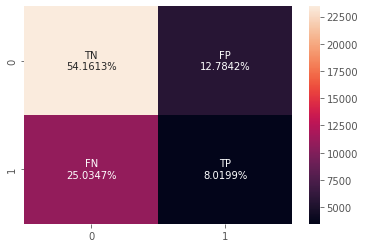

Accuracy:0.6218114602587801
F1:0.29781209781209783
Precision:0.385495335406486
Recall:0.2426254718300014



In [288]:
model_knn_credit = KNeighborsClassifier()
model_knn_credit.fit(X_credit_train,y_credit_train)
predict_knn_credit = model_knn_credit.predict(X_credit_val)
visualize().cfm(y_credit_val,predict_knn_credit)
print_score(y_credit_val,predict_knn_credit)

## Naive Bayes 

In [289]:
from sklearn.naive_bayes import GaussianNB

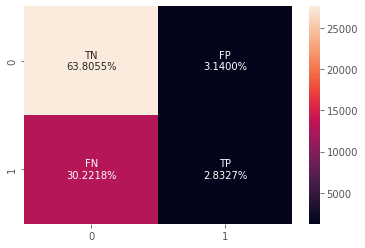

Accuracy:0.6663817005545286
F1:0.14516606476821975
Precision:0.47427466150870407
Recall:0.08569830840206906



In [290]:
model_gnb_credit = GaussianNB()
model_gnb_credit.fit(X_credit_train,y_credit_train)
predict_gnb_credit = model_gnb_credit.predict(X_credit_val)
visualize().cfm(y_credit_val,predict_gnb_credit)
print_score(y_credit_val,predict_gnb_credit)

## Logistic Regression 

In [291]:
from sklearn.linear_model import LogisticRegression

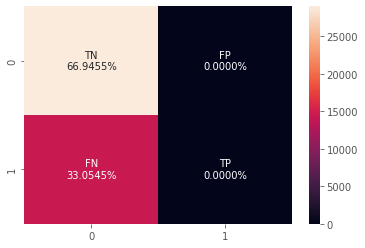

Accuracy:0.6694547134935305
F1:0.0
Precision:0.0
Recall:0.0



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [292]:
model_lr_credit = LogisticRegression(random_state = 42)
model_lr_credit.fit(X_credit_train,y_credit_train)
predict_lr_credit = model_lr_credit.predict(X_credit_val)
visualize().cfm(y_credit_val, predict_lr_credit)
print_score(y_credit_val,predict_lr_credit)

## Decision Tree 

In [293]:
from sklearn.tree import DecisionTreeClassifier

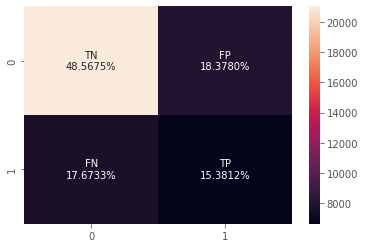

Accuracy:0.6394870609981516
F1:0.46042120551924476
Precision:0.45561563205803846
Recall:0.4653292324898644



In [294]:
model_dt_credit = DecisionTreeClassifier(random_state = 42)
model_dt_credit.fit(X_credit_train,y_credit_train)
predict_dt_credit = model_dt_credit.predict(X_credit_val)
visualize().cfm(y_credit_val, predict_dt_credit)
print_score(y_credit_val,predict_dt_credit)

## Random Forest 

In [295]:
from sklearn.ensemble import RandomForestClassifier

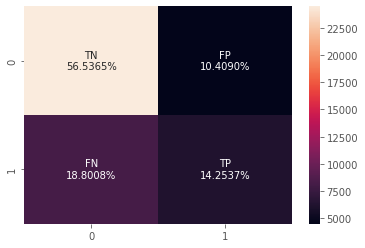

Accuracy:0.7079020332717191
F1:0.4939151321056845
Precision:0.5779464118418587
Recall:0.4312176709073116



In [296]:
model_rf_credit = RandomForestClassifier(random_state = 42)
model_rf_credit.fit(X_credit_train,y_credit_train)
predict_rf_credit = model_rf_credit.predict(X_credit_val)
visualize().cfm(y_credit_val, predict_rf_credit)
print_score(y_credit_val,predict_rf_credit)

## Ada Boost

In [297]:
from sklearn.ensemble import AdaBoostClassifier

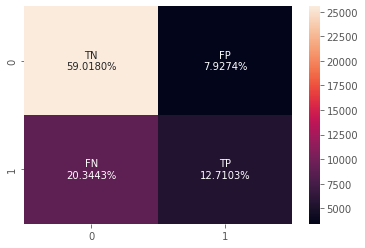

Accuracy:0.71728280961183
F1:0.47344866167484295
Precision:0.6158755038065383
Recall:0.3845239759541451



In [298]:
model_ada_credit = AdaBoostClassifier(random_state = 42)
model_ada_credit.fit(X_credit_train,y_credit_train)
predict_ada_credit = model_ada_credit.predict(X_credit_val)
visualize().cfm(y_credit_val,predict_ada_credit)
print_score(y_credit_val,predict_ada_credit)

## XGBoost 

In [299]:
from sklearn.ensemble import GradientBoostingClassifier

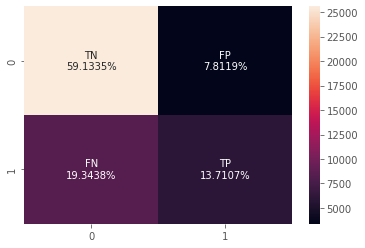

Accuracy:0.7284426987060998
F1:0.5024342745861733
Precision:0.6370370370370371
Recall:0.41479099678456594



In [300]:
model_xgb_credit = GradientBoostingClassifier(random_state = 42)
model_xgb_credit.fit(X_credit_train,y_credit_train)
predict_xgb_credit = model_xgb_credit.predict(X_credit_val)
visualize().cfm(y_credit_val,predict_xgb_credit)
print_score(y_credit_val,predict_xgb_credit)

# Summary

In [301]:
df_credit_product = pd.DataFrame(data = [['Logistic Regression',*get_score(y_credit_val,predict_lr_credit)],
                           ['Decision Tree',*get_score(y_credit_val,predict_dt_credit)],
                           ['Random Forest',*get_score(y_credit_val,predict_rf_credit)],
                           ['XGBoost',*get_score(y_credit_val,predict_xgb_credit)],
                           ['Ada Boost',*get_score(y_credit_val,predict_ada_credit)],
                           ['Naive Bayes',*get_score(y_credit_val,predict_gnb_credit)],
                           ['KNN',*get_score(y_credit_val,predict_knn_credit)]],



columns = ['Model','Accuracy','F1','Precision','Recall']
                  
                  
            )
df_credit_product

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.669455,0.000000,0.000000,0.000000
1,Decision Tree,0.639487,0.460421,0.455616,0.465329
2,Random Forest,0.707902,0.493915,0.577946,0.431218
3,XGBoost,0.728443,0.502434,0.637037,0.414791
4,Ada Boost,0.717283,0.473449,0.615876,0.384524
5,Naive Bayes,0.666382,0.145166,0.474275,0.085698
6,KNN,0.621811,0.297812,0.385495,0.242625


In [302]:
df_credit_product.sort_values(by = ['F1'],ascending = False)

,Model,Accuracy,F1,Precision,Recall
3,XGBoost,0.728443,0.502434,0.637037,0.414791
2,Random Forest,0.707902,0.493915,0.577946,0.431218
4,Ada Boost,0.717283,0.473449,0.615876,0.384524
1,Decision Tree,0.639487,0.460421,0.455616,0.465329
6,KNN,0.621811,0.297812,0.385495,0.242625
5,Naive Bayes,0.666382,0.145166,0.474275,0.085698
0,Logistic Regression,0.669455,0.000000,0.000000,0.000000


## Using XGBoost to replace missing values

In [303]:
X_credit_test = df_train[df_train['Credit_Product'] == -9999].drop(['Credit_Product','Is_Lead'],axis = 1)
X_credit_test

,Is_Male,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4
ID,,,,,,,,,,,,,,
ETQCZFEJ,1,62,82,20,1056750,1,0,1,0,0,0,0,1,0
UJ2NJKKL,1,33,68,69,517063,1,0,0,0,1,0,1,0,0
ABPMK4WU,0,32,79,15,1072850,1,0,0,1,0,0,0,0,1
MTEIXMB9,0,41,68,62,962383,0,0,0,0,1,0,0,1,0
6WX9JDVK,0,63,54,103,1249319,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WVJFPREY,0,51,81,99,552992,0,1,0,0,0,0,0,1,0
WIZBXYQZ,0,50,77,92,1385124,0,0,0,0,1,0,1,0,0
MARTXU7T,1,53,54,19,1141825,1,0,1,0,0,0,1,0,0


In [304]:
y_credit_test = model_xgb_credit.predict(X_credit_test)

In [305]:
X_credit_test['Credit_Product'] = y_credit_test
X_credit_test

,Is_Male,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product
ID,,,,,,,,,,,,,,,
ETQCZFEJ,1,62,82,20,1056750,1,0,1,0,0,0,0,1,0,0.0
UJ2NJKKL,1,33,68,69,517063,1,0,0,0,1,0,1,0,0,0.0
ABPMK4WU,0,32,79,15,1072850,1,0,0,1,0,0,0,0,1,0.0
MTEIXMB9,0,41,68,62,962383,0,0,0,0,1,0,0,1,0,1.0
6WX9JDVK,0,63,54,103,1249319,1,0,1,0,0,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WVJFPREY,0,51,81,99,552992,0,1,0,0,0,0,0,1,0,1.0
WIZBXYQZ,0,50,77,92,1385124,0,0,0,0,1,0,1,0,0,1.0
MARTXU7T,1,53,54,19,1141825,1,0,1,0,0,0,1,0,0,0.0


In [306]:
X_credit['Credit_Product'] = y_credit

In [307]:
X_credit

,Is_Male,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product
ID,,,,,,,,,,,,,,,
NNVBBKZB,0,73,68,43,1045696,0,0,1,0,0,0,0,1,0,0.0
IDD62UNG,0,30,77,32,581988,0,0,0,1,0,1,0,0,0,0.0
HD3DSEMC,0,56,68,26,1484315,1,0,0,0,1,0,0,1,0,0.0
BF3NC7KV,1,34,70,19,470454,0,0,0,1,0,1,0,0,0,0.0
TEASRWXV,0,30,82,33,886787,0,0,0,1,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DQ48DATH,0,38,80,13,354665,0,0,0,1,0,0,1,0,0,1.0
HFNB7JY8,1,27,68,15,862952,1,0,0,1,0,1,0,0,0,0.0
GEHAUCWT,0,26,81,13,670659,0,0,0,1,0,1,0,0,0,0.0


In [308]:
df_train = pd.concat([X_credit,X_credit_test])
df_train['Is_Lead'] = y

In [309]:
df_train

,Is_Male,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product,Is_Lead
ID,,,,,,,,,,,,,,,,
NNVBBKZB,0,73,68,43,1045696,0,0,1,0,0,0,0,1,0,0.0,0
IDD62UNG,0,30,77,32,581988,0,0,0,1,0,1,0,0,0,0.0,0
HD3DSEMC,0,56,68,26,1484315,1,0,0,0,1,0,0,1,0,0.0,0
BF3NC7KV,1,34,70,19,470454,0,0,0,1,0,1,0,0,0,0.0,0
TEASRWXV,0,30,82,33,886787,0,0,0,1,0,1,0,0,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WVJFPREY,0,51,81,99,552992,0,1,0,0,0,0,0,1,0,1.0,1
WIZBXYQZ,0,50,77,92,1385124,0,0,0,0,1,0,1,0,0,1.0,1
MARTXU7T,1,53,54,19,1141825,1,0,1,0,0,0,1,0,0,0.0,1


In [310]:
df_train.isnull().sum()

Is_Male                     0
Age                         0
Region_Code                 0
Vintage                     0
Avg_Account_Balance         0
Is_Active                   0
Occupation_Entrepreneur     0
Occupation_Other            0
Occupation_Salaried         0
Occupation_Self_Employed    0
Channel_Code_X1             0
Channel_Code_X2             0
Channel_Code_X3             0
Channel_Code_X4             0
Credit_Product              0
Is_Lead                     0
dtype: int64

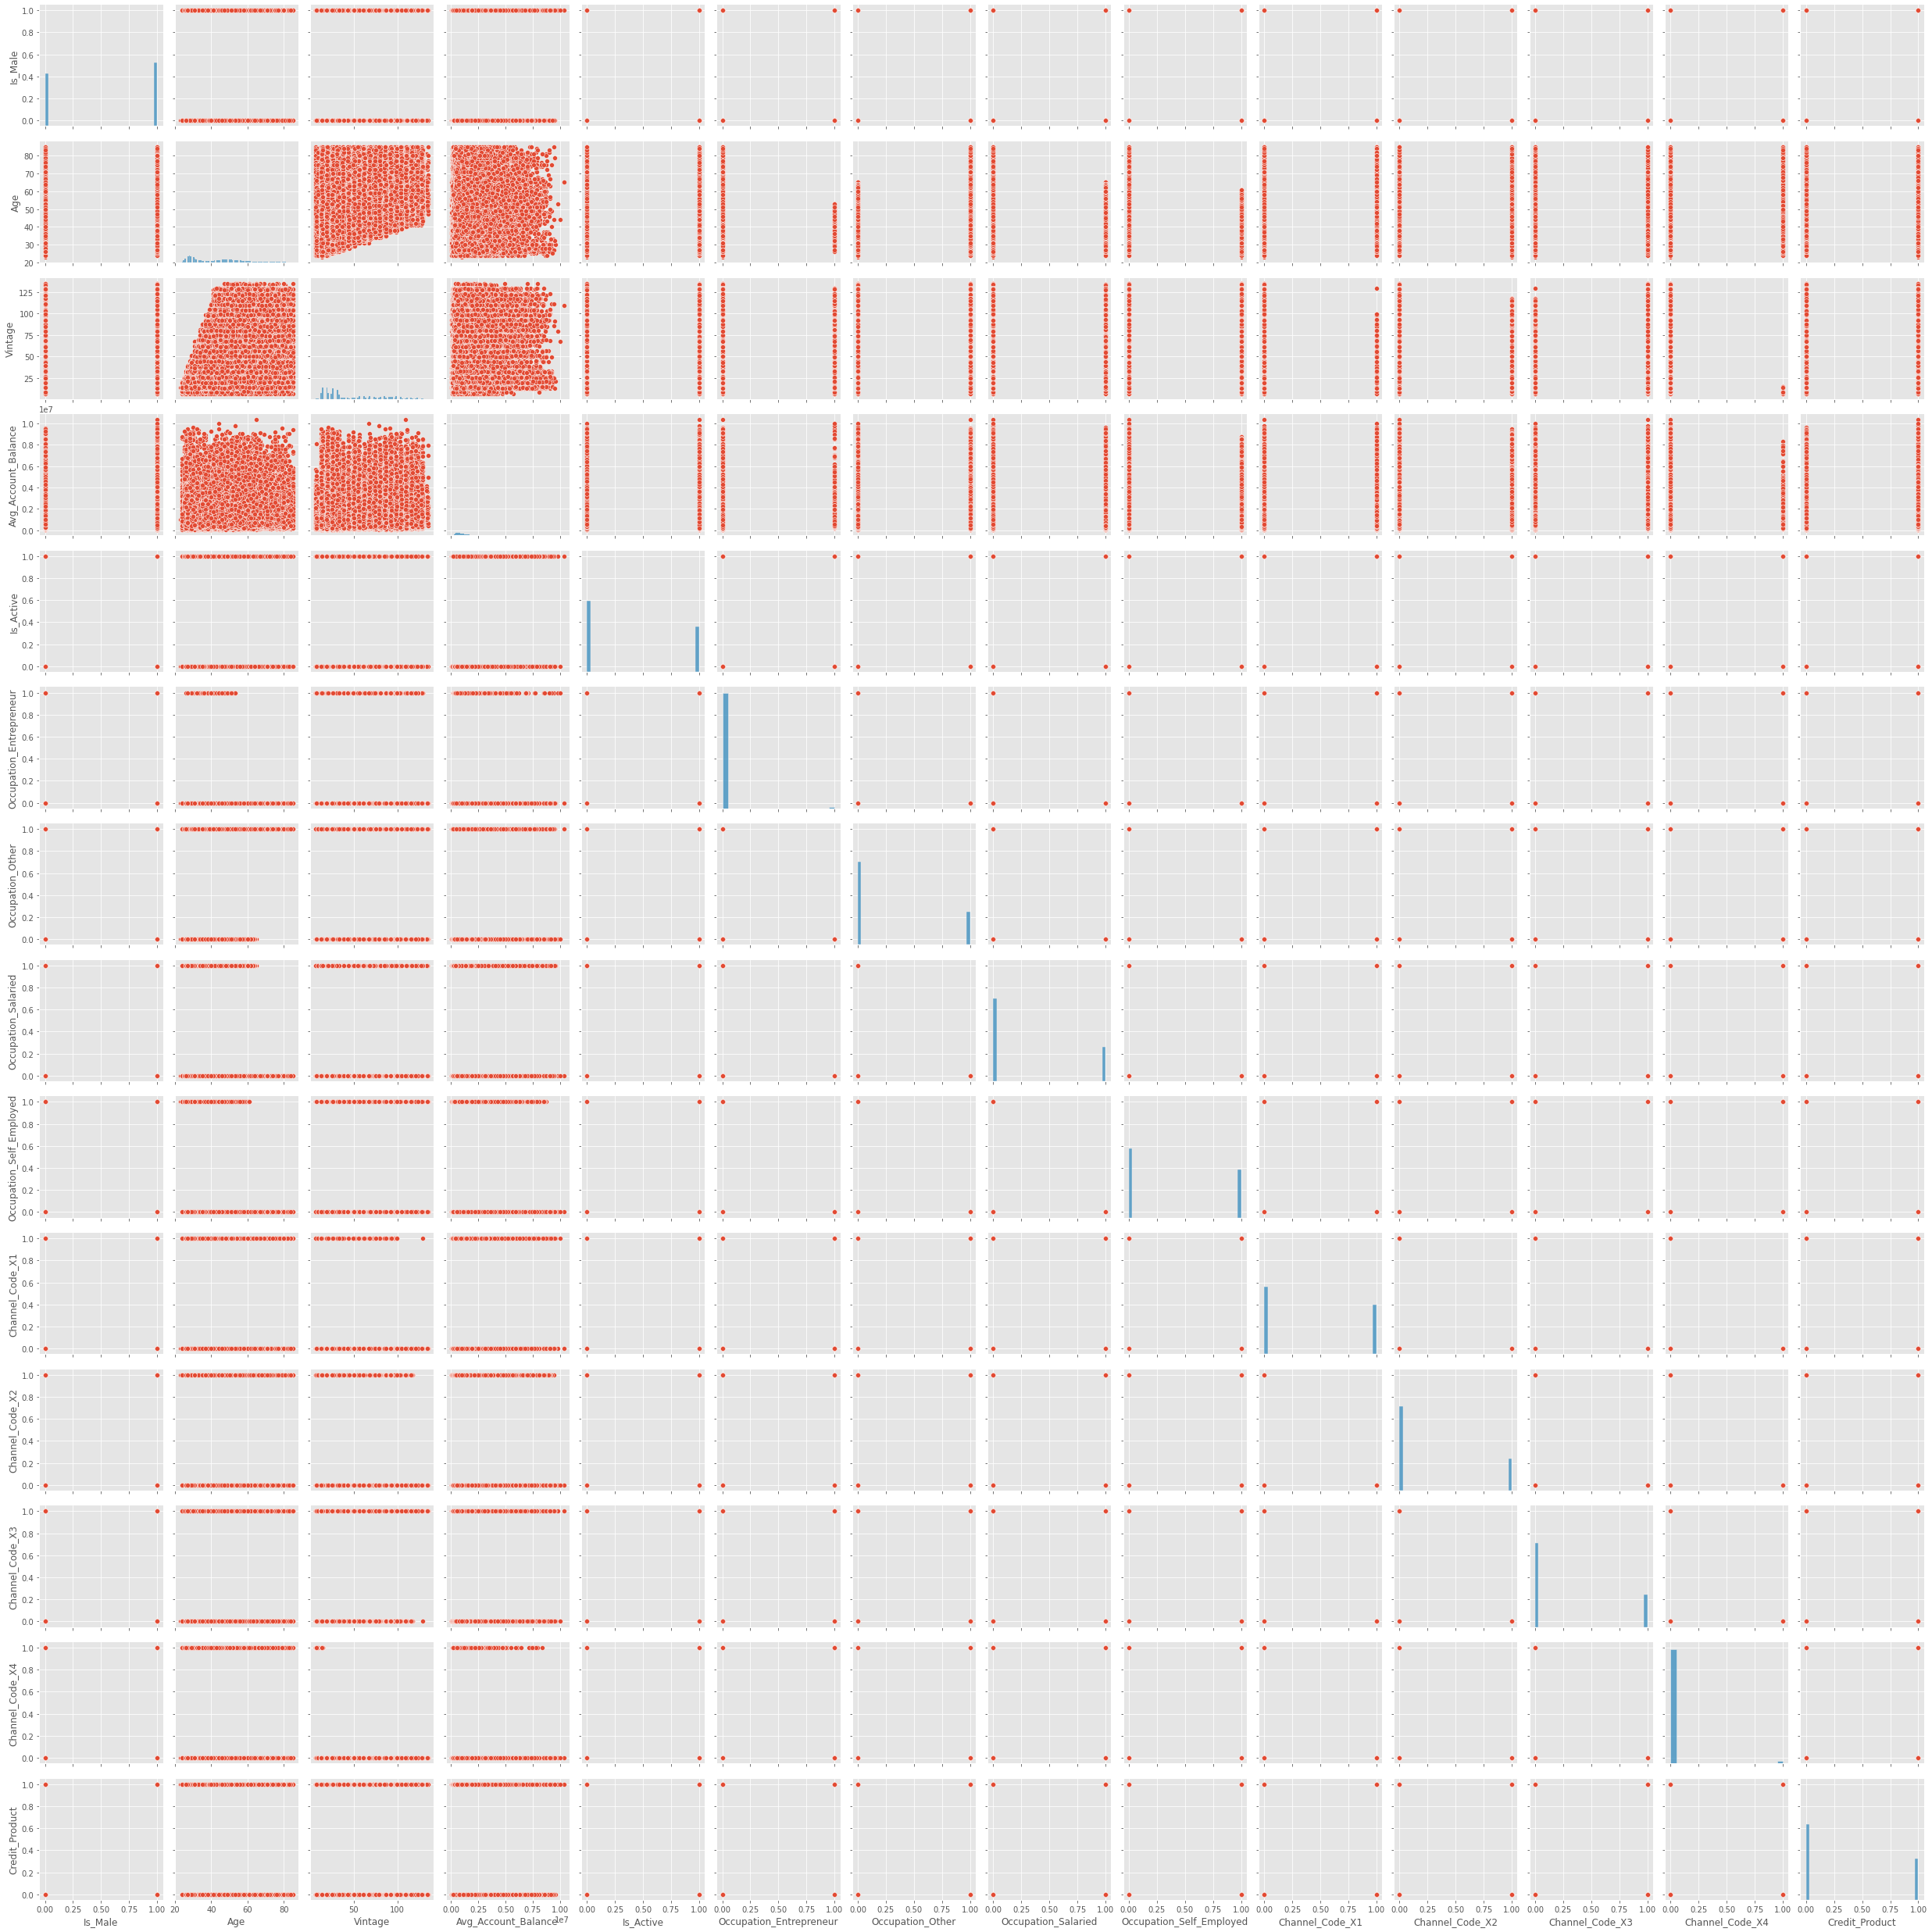

In [311]:
sns.pairplot(df_train.drop(['Is_Lead'],axis = 1))

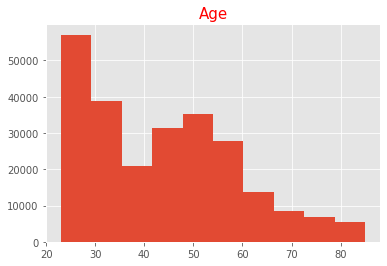

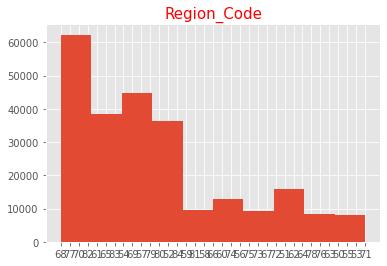

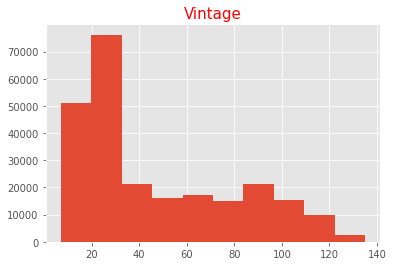

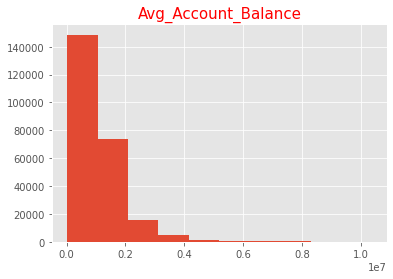

In [312]:
columns = ['Age','Region_Code','Vintage','Avg_Account_Balance']
visualize(df_train,columns).histplot()

In [313]:
df_train.describe()

,Is_Male,Age,Vintage,Avg_Account_Balance,Is_Active,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product,Is_Lead
count,245725.000000,245725.000000,245725.000000,2.457250e+05,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000,245725.000000
mean,0.546127,43.856307,46.959141,1.128403e+06,0.388381,0.010854,0.285575,0.293006,0.410565,0.422090,0.275617,0.279630,0.022664,0.350400,0.237208
std,0.497869,14.828672,32.353136,8.529364e+05,0.487383,0.103614,0.451689,0.455142,0.491937,0.493894,0.446826,0.448818,0.148829,0.477096,0.425372
min,0.000000,23.000000,7.000000,2.079000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30.000000,20.000000,6.043100e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,43.000000,32.000000,8.946010e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,54.000000,73.000000,1.366666e+06,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,85.000000,135.000000,1.035201e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [314]:
df_train.groupby(by = 'Is_Male')['Is_Lead'].value_counts()

Is_Male  Is_Lead
0        0          88823
         1          22705
1        0          98614
         1          35583
Name: Is_Lead, dtype: int64

In [315]:
df_train.groupby(by = ['Is_Male','Is_Lead'])['Is_Active'].value_counts()

Is_Male  Is_Lead  Is_Active
0        0        0            59454
                  1            29369
         1        0            12587
                  1            10118
1        0        0            59553
                  1            39061
         1        0            18696
                  1            16887
Name: Is_Active, dtype: int64

In [316]:
df_train.groupby(by = ['Is_Male','Is_Active','Credit_Product'])['Is_Lead'].value_counts()

Is_Male  Is_Active  Credit_Product  Is_Lead
0        0          0.0             0          41602
                                    1           4103
                    1.0             0          17852
                                    1           8484
         1          0.0             0          24856
                                    1           5561
                    1.0             1           4557
                                    0           4513
1        0          0.0             0          38098
                                    1           5030
                    1.0             0          21455
                                    1          13666
         1          0.0             0          31571
                                    1           8802
                    1.0             1           8085
                                    0           7490
Name: Is_Lead, dtype: int64

In [317]:
df_train.groupby(by = ['Is_Male','Is_Active','Credit_Product'])['Age'].describe()

count       mean        std   min   25%  \
Is_Male Is_Active Credit_Product                                              
0       0         0.0             45705.0  35.751537  12.532306  24.0  28.0   
                  1.0             26336.0  44.387037  14.721455  23.0  30.0   
        1         0.0             30417.0  44.865338  15.398813  24.0  30.0   
                  1.0              9070.0  49.355347  12.153735  24.0  42.0   
1       0         0.0             43128.0  39.782114  14.622048  24.0  29.0   
                  1.0             35121.0  47.946414  13.794098  24.0  38.0   
        1         0.0             40373.0  48.533896  14.300924  24.0  38.0   
                  1.0             15575.0  51.503050  11.394976  24.0  45.0   

                                   50%   75%   max  
Is_Male Is_Active Credit_Product                    
0       0         0.0             30.0  38.0  85.0  
                  1.0             44.0  54.0  85.0  
        1         0.0             44.0  54.0  85.0  
                  1.0             49.0  56.0  85.0  
1       0         0.0             33.0  49.0  85.0  
                  1.0             48.0  57.0  85.0  
        1         0.0             48.0  57.0  85.0  
                  1.0             51.0  58.0  85.0

In [318]:
df_train.groupby(by = ['Is_Male','Is_Active','Credit_Product','Is_Lead'])['Age'].describe()

count       mean        std   min  \
Is_Male Is_Active Credit_Product Is_Lead                                        
0       0         0.0            0        41602.0  34.999039  11.851255  24.0   
                                 1         4103.0  43.381428  16.172236  24.0   
                  1.0            0        17852.0  42.130910  15.130580  23.0   
                                 1         8484.0  49.134371  12.561628  24.0   
        1         0.0            0        24856.0  43.768828  15.572758  24.0   
                                 1         5561.0  49.766409  13.552971  24.0   
                  1.0            0         4513.0  49.128739  13.881114  24.0   
                                 1         4557.0  49.579767  10.154148  24.0   
1       0         0.0            0        38098.0  38.761694  14.078140  24.0   
                                 1         5030.0  47.510934  16.262444  24.0   
                  1.0            0        21455.0  45.852622  14.579335  24.0   
                                 1        13666.0  51.233572  11.731258  24.0   
        1         0.0            0        31571.0  47.479301  14.535972  24.0   
                                 1         8802.0  52.316519  12.725039  24.0   
                  1.0            0         7490.0  51.438852  12.607325  24.0   
                                 1         8085.0  51.562523  10.143805  24.0   

                                           25%   50%   75%   max  
Is_Male Is_Active Credit_Product Is_Lead                          
0       0         0.0            0        28.0  30.0  36.0  85.0  
                                 1        29.0  40.0  53.0  85.0  
                  1.0            0        29.0  39.0  52.0  85.0  
                                 1        41.0  48.0  56.0  85.0  
        1         0.0            0        29.0  42.0  54.0  85.0  
                                 1        41.0  48.0  57.0  85.0  
                  1.0            0        39.0  49.0  57.0  85.0  
                                 1        44.0  49.0  55.0  85.0  
1       0         0.0            0        28.0  32.0  48.0  85.0  
                                 1        32.0  47.0  58.0  85.0  
                  1.0            0        32.0  46.0  56.0  85.0  
                                 1        44.0  51.0  58.0  85.0  
        1         0.0            0        36.0  47.0  56.5  85.0  
                                 1        44.0  51.0  59.0  85.0  
                  1.0            0        44.0  51.0  59.0  85.0  
                                 1        45.0  51.0  57.0  85.0

# Hypothesis approved on train data! 
# If you are Man,older then 50 years old and you have other credit product we could recommend you credit card

# Building models to find customers that could show higher intent towards a recommended credit card and approved our hypothesis on test data

In [319]:
X = df_train.drop(['Is_Lead'],axis = 1)
y = df_train['Is_Lead']

In [320]:
X_train,X_val,y_train,y_val = train_test_split(X,y,test_size = 0.2,random_state = 42)

In [321]:
X_train

,Is_Male,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product
ID,,,,,,,,,,,,,,,
3Z2XBEMB,0,38,68,56,1621126,0,0,0,0,1,0,0,1,0,0.0
EK2AFF4Z,1,83,80,81,426781,0,0,1,0,0,0,0,1,0,0.0
HV95PKZU,0,54,75,75,407424,0,0,0,0,1,0,0,1,0,0.0
N5JDZBIT,0,69,84,79,517748,0,0,1,0,0,0,1,0,0,0.0
DEUXRK8K,0,29,83,21,2078034,1,0,0,1,0,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
OPWP3HTG,1,46,83,20,1357107,1,0,0,0,1,0,1,0,0,0.0
EA5TNVMC,1,42,80,20,236321,1,0,0,0,1,0,1,0,0,1.0
DUJCXVTA,0,30,83,25,1205407,0,0,0,0,1,0,1,0,0,0.0


## KNN 

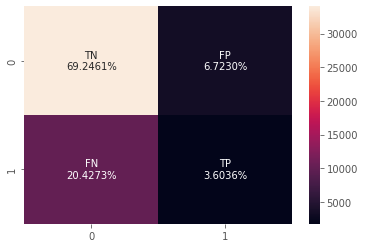

Accuracy:0.7284973038966324
F1:0.20977198697068405
Precision:0.3489655172413793
Recall:0.14995766299745977



In [322]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train,y_train)
predict_knn = model_knn.predict(X_val)
visualize().cfm(y_val, predict_knn)
print_score(y_val,predict_knn)

## Naive Bayes 

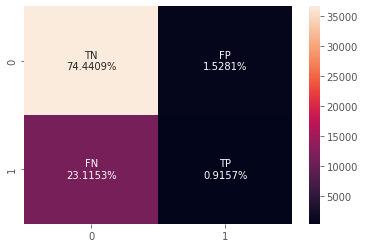

Accuracy:0.7535659782276936
F1:0.06917223887479826
Precision:0.37468776019983346
Recall:0.03810330228619814



In [323]:
model_gnb = GaussianNB()
model_gnb.fit(X_train,y_train)
predict_gnb = model_gnb.predict(X_val)
visualize().cfm(y_val,predict_gnb)
print_score(y_val,predict_gnb)

## Logistic Regression 

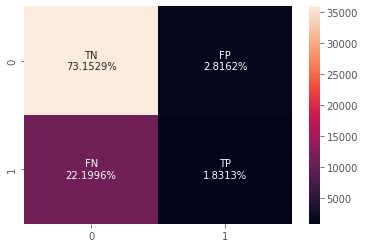

Accuracy:0.7498423033879337
F1:0.12771392081736913
Precision:0.39404553415061294
Recall:0.07620660457239628



In [324]:
model_lr = LogisticRegression(random_state = 42)
model_lr.fit(X_train,y_train)
predict_lr = model_lr.predict(X_val)
visualize().cfm(y_val, predict_lr)
print_score(y_val,predict_lr)

## Decision Tree

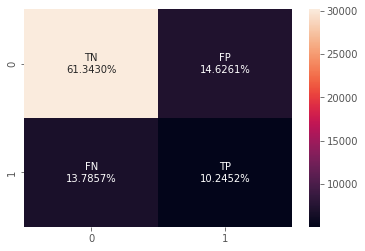

Accuracy:0.7158815749313256
F1:0.41900719843548456
Precision:0.4119283318334288
Recall:0.4263336155800169



In [325]:
model_dt = DecisionTreeClassifier(random_state = 42)
model_dt.fit(X_train,y_train)
predict_dt = model_dt.predict(X_val)
visualize().cfm(y_val, predict_dt)
print_score(y_val,predict_dt)

## Random Forest

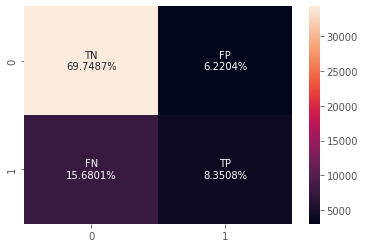

Accuracy:0.7809950147522637
F1:0.43266037636392385
Precision:0.5731043150397989
Recall:0.347502116850127



In [326]:
model_rf = RandomForestClassifier(random_state = 42)
model_rf.fit(X_train,y_train)
predict_rf = model_rf.predict(X_val)
visualize().cfm(y_val, predict_rf)
print_score(y_val,predict_rf)

## Ada Boost

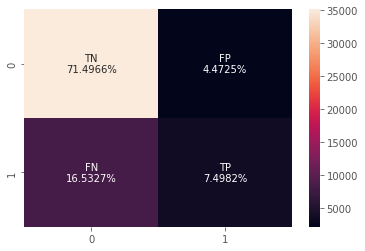

Accuracy:0.7899481127276426
F1:0.41654891765104846
Precision:0.6263810980792113
Recall:0.31202370872142254



In [327]:
model_ada = AdaBoostClassifier(random_state = 42)
model_ada.fit(X_train,y_train)
predict_ada = model_ada.predict(X_val)
visualize().cfm(y_val,predict_ada)
print_score(y_val,predict_ada)

## XGBoost

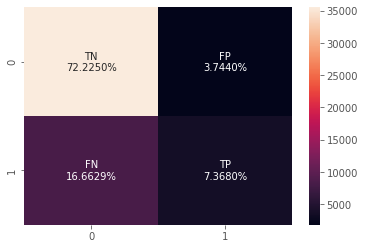

Accuracy:0.7959304100111914
F1:0.4193156157721036
Precision:0.6630653726423732
Recall:0.30660457239627437



In [328]:
model_xgb = GradientBoostingClassifier(random_state = 42)
model_xgb.fit(X_train,y_train)
predict_xgb = model_xgb.predict(X_val)
visualize().cfm(y_val,predict_xgb)
print_score(y_val,predict_xgb)

In [329]:
df_credit_lead_bt = pd.DataFrame(data = [['Logistic Regression',*get_score(y_val,predict_lr)],
                           ['Decision Tree',*get_score(y_val,predict_dt)],
                           ['Random Forest',*get_score(y_val,predict_rf)],
                           ['XGBoost',*get_score(y_val,predict_xgb)],
                           ['Ada Boost',*get_score(y_val,predict_ada)],
                           ['Naive Bayes',*get_score(y_val,predict_gnb)],
                           ['KNN',*get_score(y_val,predict_knn)]],



columns = ['Model','Accuracy','F1','Precision','Recall']
                  
                  
            )
df_credit_lead_bt

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.749842,0.127714,0.394046,0.076207
1,Decision Tree,0.715882,0.419007,0.411928,0.426334
2,Random Forest,0.780995,0.432660,0.573104,0.347502
3,XGBoost,0.795930,0.419316,0.663065,0.306605
4,Ada Boost,0.789948,0.416549,0.626381,0.312024
5,Naive Bayes,0.753566,0.069172,0.374688,0.038103
6,KNN,0.728497,0.209772,0.348966,0.149958


In [330]:
df_credit_lead_bt.sort_values(by = ['F1','Precision','Recall'],ascending = False)

,Model,Accuracy,F1,Precision,Recall
2,Random Forest,0.780995,0.432660,0.573104,0.347502
3,XGBoost,0.795930,0.419316,0.663065,0.306605
1,Decision Tree,0.715882,0.419007,0.411928,0.426334
4,Ada Boost,0.789948,0.416549,0.626381,0.312024
6,KNN,0.728497,0.209772,0.348966,0.149958
0,Logistic Regression,0.749842,0.127714,0.394046,0.076207
5,Naive Bayes,0.753566,0.069172,0.374688,0.038103


## Hyper-parametr tuning

## Deicison Tree

In [ ]:
para_dt = {'criterion':['gini','entropy'],'max_depth':np.arange(1, 50), 'min_samples_leaf':[1,2,4,5,10,20,40,80,100]}
grid_dt = GridSearchCV(model_dt, para_dt, cv=5,verbose = 2)
rs_dt = RandomizedSearchCV(model_dt,para_dt,cv=5,verbose = 2)
grid_dt.fit(X_train,y_train)
rs_dt.fit(X_train,y_train)
print('Best grid parameters for Decision Tree:', grid_dt.best_params_)
print('Best randomized parameters for Decision Tree:', rs_dt.best_params_)

## Random Forest

In [ ]:
params_rf = {'n_estimators':[100,250, 350, 500], 'min_samples_leaf':[2, 5,10, 30,50,100]}
grid_rf = GridSearchCV(model_rf, params_rf, cv=5,verbose = 2)
rs_rf = RandomizedSearchCV(model_rf, params_rf, cv=5,verbose = 2)
grid_rf.fit(X_train,y_train)
rs_rf.fit(X_train,y_train)
print('Best grid parameters for Random Forest:', grid_rf.best_params_)
print('Best randomized parameters for Random Forest:', rs_rf.best_params_)

## Ada Boost

In [ ]:
params_ada = {'n_estimators': [50,100,250,400,500,600,1000], 'learning_rate': [0.01,0.02,0.05,0.2,0.5,0.8,1]}
grid_ada =  GridSearchCV(model_ada, params_ada, cv=5,verbose = 2)
rs_ada =  RandomizedSearchCV(model_ada, params_ada, cv=5,verbose = 2)
grid_ada.fit(X_train,y_train)
rs_ada.fit(X_train,y_train)
print('Best grid parameters for AdaBoost:', grid_ada.best_params_)
print('Best randomized parameters for AdaBoost:', rs_ada.best_params_)

## XGBoost

In [ ]:
params_xgb = {'n_estimators': [50,250,350,500,1000], 'learning_rate': [0.01,0.05,0.2,0.5,1]}
grid_xgb = GridSearchCV(model_xgb, params_xgb, cv=5,verbose = 2)
rs_xgb = RandomizedSearchCV(model_xgb,params_xgb,cv = 5,verbose = 2)
grid_xgb.fit(X_train,y_train)
rs_xgb.fit(X_train,y_train)
print('Best grid parameters for XGBoost:', grid_xgb.best_params_)
print('Best randomized parameters for XGBoost:', rs_xgb.best_params_)

# After tuning

## Decision Tree

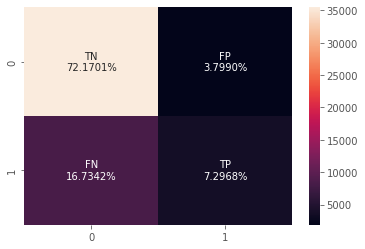

Accuracy:0.7946688371146607
F1:0.41545501940566526
Precision:0.6576196589033559
Recall:0.3036409822184589



In [331]:
model_grid_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 9, min_samples_leaf =20,random_state = 42)
model_grid_dt.fit(X_train,y_train)
predict_grid_dt = model_grid_dt.predict(X_val)
visualize().cfm(y_val,predict_grid_dt)
print_score(y_val,predict_grid_dt)

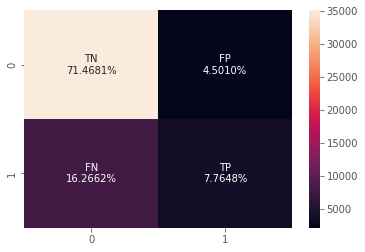

Accuracy:0.7923288228710957
F1:0.42785065590312815
Precision:0.6330457863304578
Recall:0.3231160033869602



In [332]:
model_rs_dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 44, min_samples_leaf = 100,random_state = 42)
model_rs_dt.fit(X_train,y_train)
predict_rs_dt = model_rs_dt.predict(X_val) 
visualize().cfm(y_val,predict_rs_dt)
print_score(y_val,predict_rs_dt)

## Random Forest 

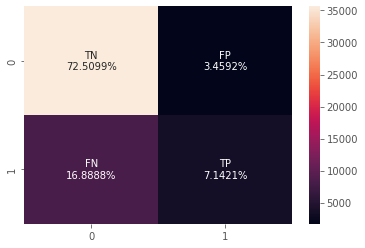

Accuracy:0.7965205005595686
F1:0.41245593419506466
Precision:0.6737044145873321
Recall:0.2972057578323455



In [333]:
model_grid_rf = RandomForestClassifier(n_estimators = 500,min_samples_leaf = 30,random_state = 42)
model_grid_rf.fit(X_train,y_train)
predict_grid_rf = model_grid_rf.predict(X_val)
visualize().cfm(y_val,predict_grid_rf)
print_score(y_val,predict_grid_rf)

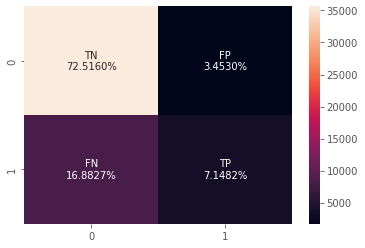

Accuracy:0.7966425882592328
F1:0.4128084606345476
Precision:0.6742802303262956
Recall:0.2974597798475868



In [334]:
model_rs_rf = RandomForestClassifier(n_estimators = 350,min_samples_leaf = 30,random_state =42 )
model_rs_rf.fit(X_train,y_train)
predict_rs_rf = model_rs_rf.predict(X_val)
visualize().cfm(y_val,predict_rs_rf)
print_score(y_val,predict_rs_rf)

## Ada Boost

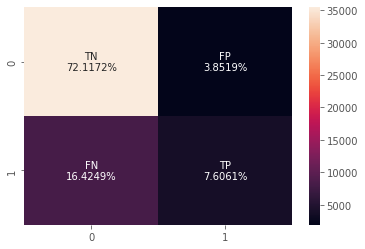

Accuracy:0.7972326788076102
F1:0.4286451464938937
Precision:0.663825253063399
Recall:0.31651143099068585



In [337]:
model_grid_xgb = GradientBoostingClassifier(n_estimators = 1000,learning_rate =0.05 ,random_state = 42 )
model_grid_xgb.fit(X_train,y_train)
predict_grid_xgb = model_grid_xgb.predict(X_val)
visualize().cfm(y_val,predict_grid_xgb)
print_score(y_val,predict_grid_xgb)

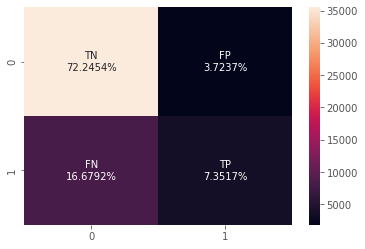

Accuracy:0.7959711059110794
F1:0.4188257114704689
Precision:0.6637883520117582
Recall:0.3059271803556308



In [338]:
model_rs_xgb = GradientBoostingClassifier(n_estimators = 250,learning_rate =0.05,random_state = 42 )
model_rs_xgb.fit(X_train,y_train)
predict_rs_xgb = model_rs_xgb.predict(X_val)
visualize().cfm(y_val,predict_rs_xgb)
print_score(y_val,predict_rs_xgb)

In [339]:
df_credit_lead_at = pd.DataFrame(data = [['Decision Tree GS',*get_score(y_val,predict_grid_dt)],
                           ['Decision Tree RS',*get_score(y_val,predict_rs_dt)],
                           ['Random Forest GS',*get_score(y_val,predict_grid_rf)],
                           ['Random Forest RS',*get_score(y_val,predict_rs_rf)],
                           ['Ada Boost GS',*get_score(y_val,predict_grid_ada)],
                           ['Ada Boost RS',*get_score(y_val,predict_rs_ada)],
                           ['XGBoost GS',*get_score(y_val,predict_grid_xgb)],
                           ['XGBoost RS',*get_score(y_val,predict_rs_xgb)]],
                          
                       



columns = ['Model','Accuracy','F1','Precision','Recall']
                  
                  
            )
df_credit_lead_at

,Model,Accuracy,F1,Precision,Recall
0,Decision Tree GS,0.794669,0.415455,0.657620,0.303641
1,Decision Tree RS,0.792329,0.427851,0.633046,0.323116
2,Random Forest GS,0.796521,0.412456,0.673704,0.297206
3,Random Forest RS,0.796643,0.412808,0.674280,0.297460
4,Ada Boost GS,0.791434,0.411731,0.638938,0.303726
5,Ada Boost RS,0.791311,0.411589,0.638256,0.303726
6,XGBoost GS,0.797233,0.428645,0.663825,0.316511
7,XGBoost RS,0.795971,0.418826,0.663788,0.305927


In [340]:
df_res = pd.concat([df_credit_lead_bt,df_credit_lead_at])

In [341]:
df_res

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.749842,0.127714,0.394046,0.076207
1,Decision Tree,0.715882,0.419007,0.411928,0.426334
2,Random Forest,0.780995,0.432660,0.573104,0.347502
3,XGBoost,0.795930,0.419316,0.663065,0.306605
4,Ada Boost,0.789948,0.416549,0.626381,0.312024
5,Naive Bayes,0.753566,0.069172,0.374688,0.038103
6,KNN,0.728497,0.209772,0.348966,0.149958
0,Decision Tree GS,0.794669,0.415455,0.657620,0.303641
1,Decision Tree RS,0.792329,0.427851,0.633046,0.323116
2,Random Forest GS,0.796521,0.412456,0.673704,0.297206


In [342]:
df_res.sort_values(by = ['Accuracy','F1'],ascending = False)

,Model,Accuracy,F1,Precision,Recall
6,XGBoost GS,0.797233,0.428645,0.663825,0.316511
3,Random Forest RS,0.796643,0.412808,0.674280,0.297460
2,Random Forest GS,0.796521,0.412456,0.673704,0.297206
7,XGBoost RS,0.795971,0.418826,0.663788,0.305927
3,XGBoost,0.795930,0.419316,0.663065,0.306605
0,Decision Tree GS,0.794669,0.415455,0.657620,0.303641
1,Decision Tree RS,0.792329,0.427851,0.633046,0.323116
4,Ada Boost GS,0.791434,0.411731,0.638938,0.303726
5,Ada Boost RS,0.791311,0.411589,0.638256,0.303726
4,Ada Boost,0.789948,0.416549,0.626381,0.312024


## Choose XGBoost GS, Random Forest RS for ensemble model

In [343]:
from sklearn.ensemble import VotingClassifier

[Voting] ...................... (1 of 2) Processing XGB, total= 5.0min
[Voting] ....................... (2 of 2) Processing RF, total= 1.2min


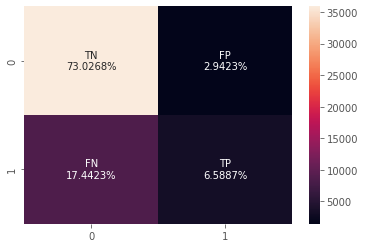

Accuracy:0.7961542374605759
F1:0.39262762216563596
Precision:0.6912894961571306
Recall:0.2741744284504657



In [344]:
model_voting = VotingClassifier(estimators=[('XGB',GradientBoostingClassifier(n_estimators = 1000,learning_rate =0.05 ,random_state = 42)),
                                     ('RF',RandomForestClassifier(n_estimators = 350,min_samples_leaf = 30,random_state =42 ))],
                         voting ='hard',verbose = 2)
model_voting.fit(X_train,y_train)
predict_voting = model_voting.predict(X_val)
visualize().cfm(y_val,predict_voting)
print_score(y_val,predict_voting)

In [345]:
voting_res = ['Voting Classifier',*get_score(y_val,predict_voting)]
df_res.loc[8] = voting_res

In [346]:
df_res

,Model,Accuracy,F1,Precision,Recall
0,Logistic Regression,0.749842,0.127714,0.394046,0.076207
1,Decision Tree,0.715882,0.419007,0.411928,0.426334
2,Random Forest,0.780995,0.432660,0.573104,0.347502
3,XGBoost,0.795930,0.419316,0.663065,0.306605
4,Ada Boost,0.789948,0.416549,0.626381,0.312024
5,Naive Bayes,0.753566,0.069172,0.374688,0.038103
6,KNN,0.728497,0.209772,0.348966,0.149958
0,Decision Tree GS,0.794669,0.415455,0.657620,0.303641
1,Decision Tree RS,0.792329,0.427851,0.633046,0.323116
2,Random Forest GS,0.796521,0.412456,0.673704,0.297206


In [347]:
df_res.sort_values(by = ['F1'],ascending = False)

,Model,Accuracy,F1,Precision,Recall
2,Random Forest,0.780995,0.432660,0.573104,0.347502
6,XGBoost GS,0.797233,0.428645,0.663825,0.316511
1,Decision Tree RS,0.792329,0.427851,0.633046,0.323116
3,XGBoost,0.795930,0.419316,0.663065,0.306605
1,Decision Tree,0.715882,0.419007,0.411928,0.426334
7,XGBoost RS,0.795971,0.418826,0.663788,0.305927
4,Ada Boost,0.789948,0.416549,0.626381,0.312024
0,Decision Tree GS,0.794669,0.415455,0.657620,0.303641
3,Random Forest RS,0.796643,0.412808,0.674280,0.297460
2,Random Forest GS,0.796521,0.412456,0.673704,0.297206


# Choose XGBoost because of the highest F1 and Precision metrics

In [348]:
model = model_grid_xgb

# Prepairing test data

In [349]:
def data_preprocessing(dataframe):
    replace_binary(dataframe,'Is_Active','No','Yes')
    replace_binary(dataframe,'Credit_Product','No','Yes')
    replace_binary(dataframe,'Gender','Female','Male')
    dataframe = dataframe.rename({'Gender':'Is_Male'},axis = 1)
    dataframe['Region_Code'] = dataframe['Region_Code'].apply(lambda x: str(x)[3:5])
    dataframe = pd.get_dummies(data=dataframe, columns=['Occupation','Channel_Code'])
    dataframe['Credit_Product'] = dataframe['Credit_Product'].fillna(-9999)
    X_dataframe_credit = dataframe[dataframe['Credit_Product'] != -9999].drop(['Credit_Product'],axis = 1)
    y_dataframe_credit = dataframe[dataframe['Credit_Product'] != -9999]['Credit_Product']
    X_dataframe_credit_test = dataframe[dataframe['Credit_Product'] == -9999].drop(['Credit_Product'],axis = 1)
    y_dataframe_credit_test = model_xgb_credit.predict(X_dataframe_credit_test)
    X_dataframe_credit_test['Credit_Product'] = y_dataframe_credit_test
    X_dataframe_credit['Credit_Product'] = y_dataframe_credit
    return pd.concat([X_dataframe_credit,X_dataframe_credit_test])

In [350]:
df_test = pd.read_csv('/kaggle/input/credit-card-buyers/test data credit card.csv',index_col = ['ID'])
df_test

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
ID,,,,,,,,,
VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...
DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No


In [351]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105312 entries, VBENBARO to F2NOYPPZ
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Gender               105312 non-null  object
 1   Age                  105312 non-null  int64 
 2   Region_Code          105312 non-null  object
 3   Occupation           105312 non-null  object
 4   Channel_Code         105312 non-null  object
 5   Vintage              105312 non-null  int64 
 6   Credit_Product       92790 non-null   object
 7   Avg_Account_Balance  105312 non-null  int64 
 8   Is_Active            105312 non-null  object
dtypes: int64(3), object(6)
memory usage: 8.0+ MB


<AxesSubplot:>

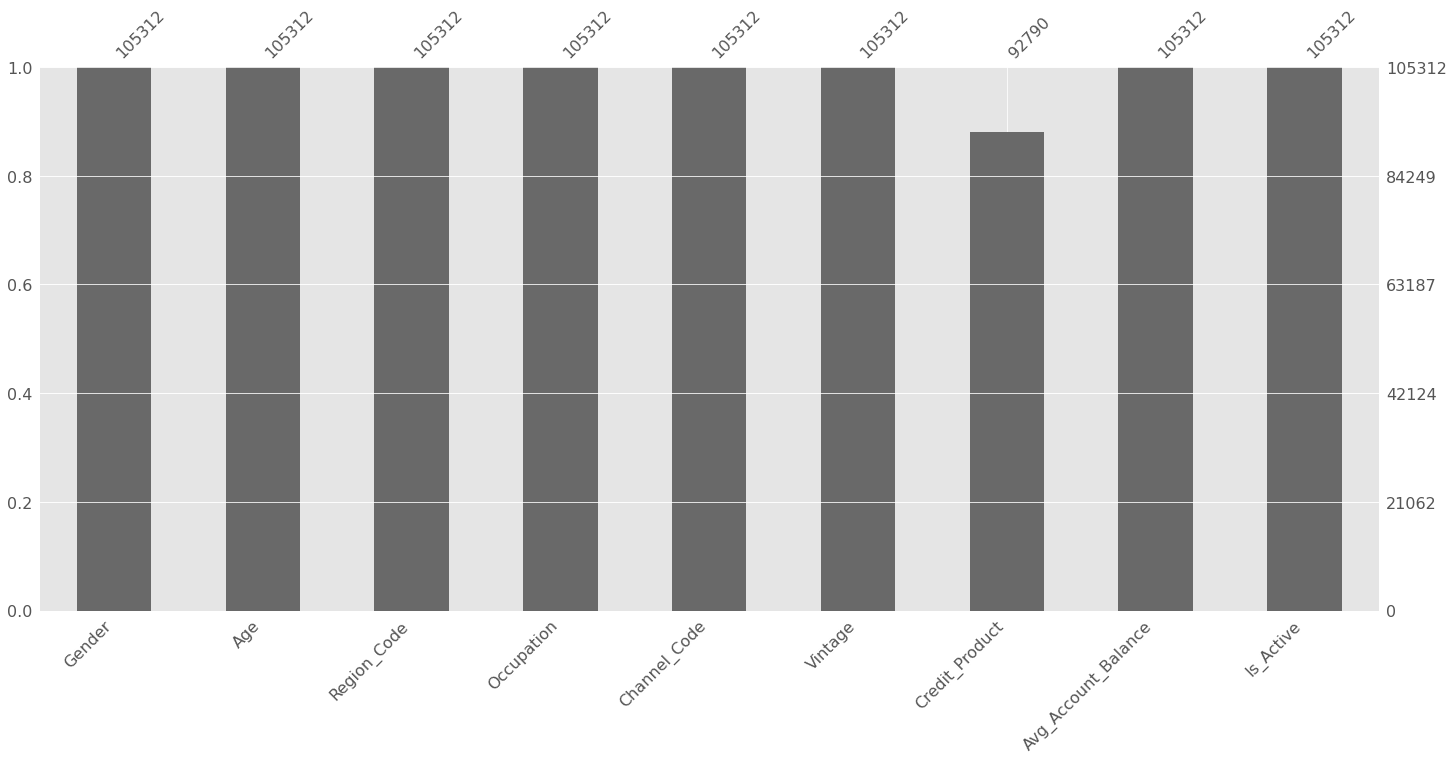

In [352]:
msno.bar(df_test)

In [353]:
df_test

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
ID,,,,,,,,,
VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No
...,...,...,...,...,...,...,...,...,...
DBENJOYI,Male,52,RG268,Salaried,X2,86,Yes,4242558,Yes
CWQ72DWS,Male,55,RG277,Other,X2,86,Yes,1159153,No
HDESC8GU,Male,35,RG254,Salaried,X4,15,No,1703727,No


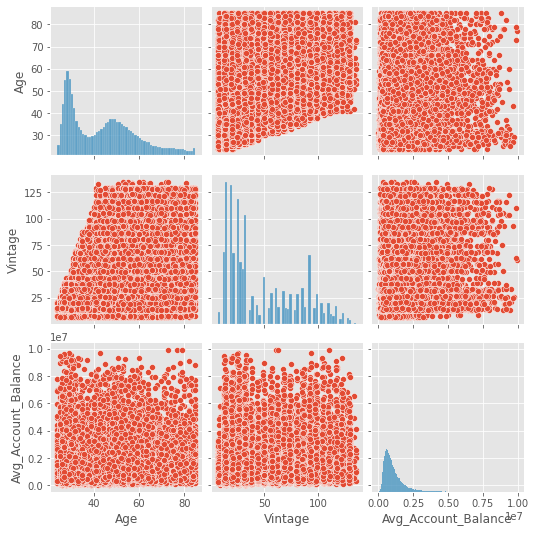

In [354]:
sns.pairplot(df_test,kind = 'scatter')

In [355]:
df_test = data_preprocessing(df_test)

In [356]:
df_test

,Is_Male,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product
ID,,,,,,,,,,,,,,,
VBENBARO,1,29,54,25,742366,0,0,1,0,0,1,0,0,0,1.0
VK3KGA9M,1,31,70,14,215949,0,0,0,1,0,1,0,0,0,0.0
TT8RPZVC,1,29,72,33,868070,0,0,1,0,0,1,0,0,0,0.0
SHQZEYTZ,0,29,70,19,657087,0,0,1,0,0,1,0,0,0,0.0
MZZAQMPT,1,60,68,110,4624262,0,0,0,0,1,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXCWURWZ,1,45,70,117,582015,1,0,0,1,0,0,0,1,0,1.0
RKSESPFM,1,46,56,86,488022,1,0,0,0,1,0,1,0,0,0.0
EPJEMD9H,1,48,68,91,1228271,1,0,0,0,1,0,1,0,0,0.0


In [357]:
df_test.isnull().sum()

Is_Male                     0
Age                         0
Region_Code                 0
Vintage                     0
Avg_Account_Balance         0
Is_Active                   0
Occupation_Entrepreneur     0
Occupation_Other            0
Occupation_Salaried         0
Occupation_Self_Employed    0
Channel_Code_X1             0
Channel_Code_X2             0
Channel_Code_X3             0
Channel_Code_X4             0
Credit_Product              0
dtype: int64

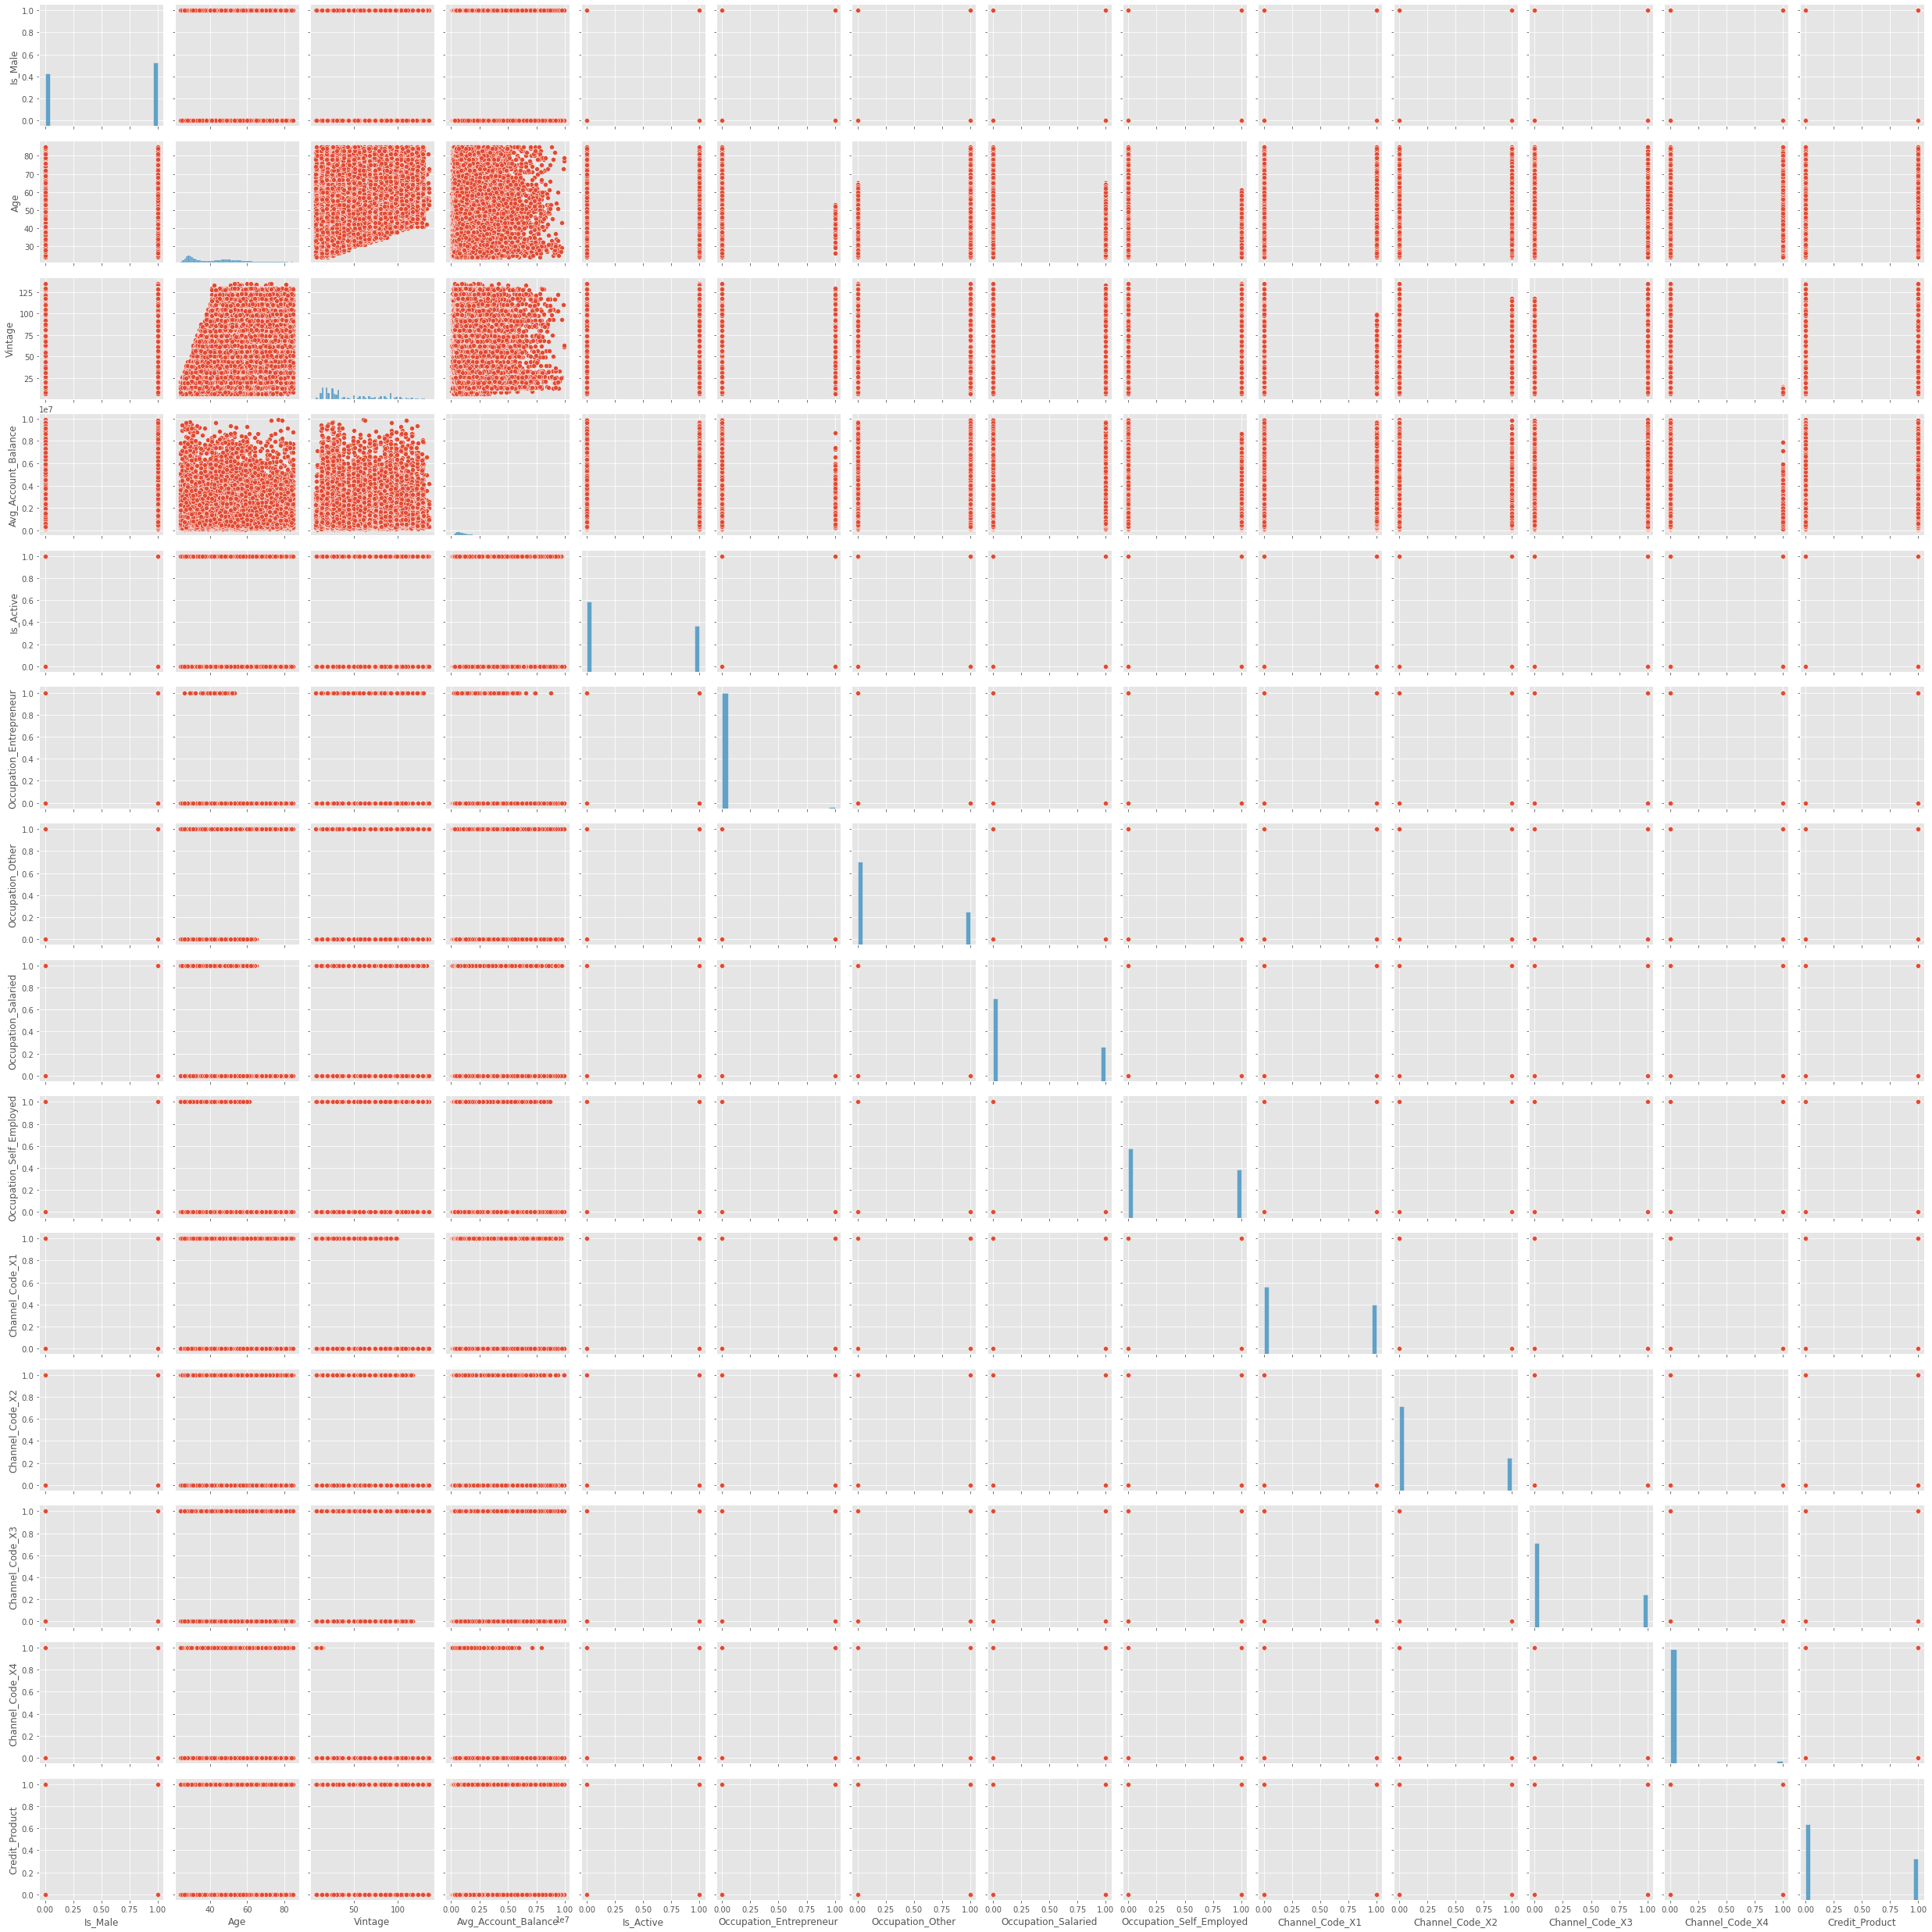

In [358]:
sns.pairplot(df_test)

<AxesSubplot:>

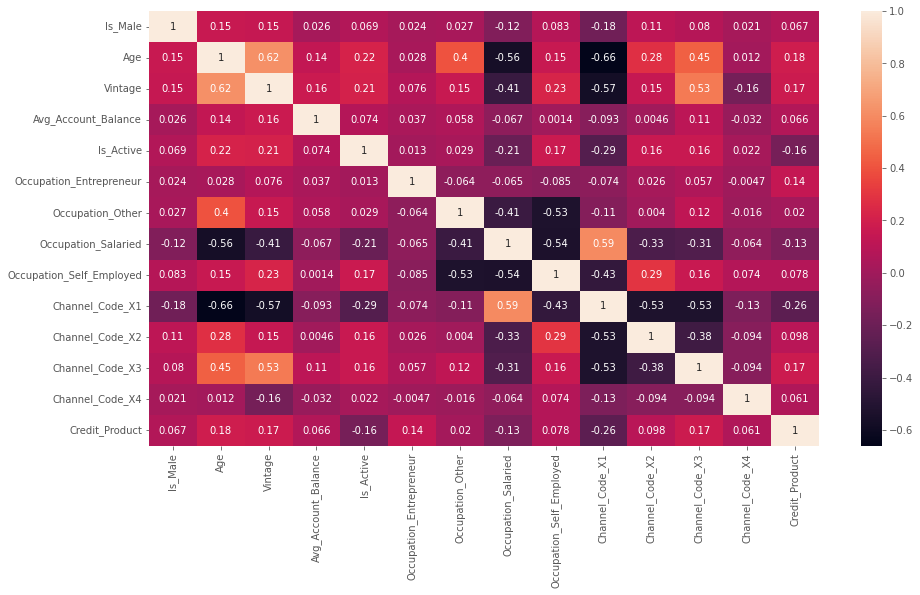

In [359]:
plt.figure(figsize = (15,8))
sns.heatmap(df_test.corr(),annot = True)

In [360]:
df_test

,Is_Male,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product
ID,,,,,,,,,,,,,,,
VBENBARO,1,29,54,25,742366,0,0,1,0,0,1,0,0,0,1.0
VK3KGA9M,1,31,70,14,215949,0,0,0,1,0,1,0,0,0,0.0
TT8RPZVC,1,29,72,33,868070,0,0,1,0,0,1,0,0,0,0.0
SHQZEYTZ,0,29,70,19,657087,0,0,1,0,0,1,0,0,0,0.0
MZZAQMPT,1,60,68,110,4624262,0,0,0,0,1,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXCWURWZ,1,45,70,117,582015,1,0,0,1,0,0,0,1,0,1.0
RKSESPFM,1,46,56,86,488022,1,0,0,0,1,0,1,0,0,0.0
EPJEMD9H,1,48,68,91,1228271,1,0,0,0,1,0,1,0,0,0.0


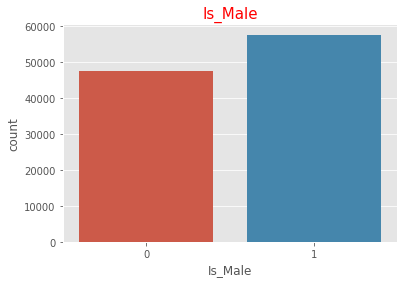

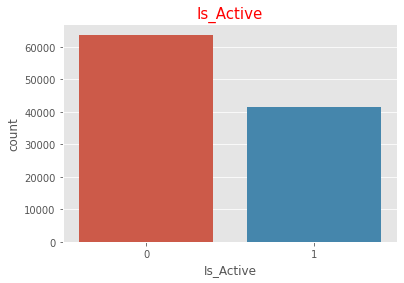

In [361]:
columns = ['Is_Male','Is_Active']
visualize(df_test,columns).countplot()

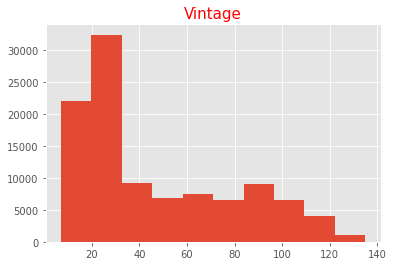

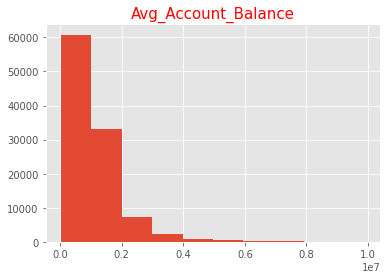

In [362]:
columns = ['Vintage','Avg_Account_Balance']
visualize(df_test,columns).histplot()

In [363]:
df_test

,Is_Male,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product
ID,,,,,,,,,,,,,,,
VBENBARO,1,29,54,25,742366,0,0,1,0,0,1,0,0,0,1.0
VK3KGA9M,1,31,70,14,215949,0,0,0,1,0,1,0,0,0,0.0
TT8RPZVC,1,29,72,33,868070,0,0,1,0,0,1,0,0,0,0.0
SHQZEYTZ,0,29,70,19,657087,0,0,1,0,0,1,0,0,0,0.0
MZZAQMPT,1,60,68,110,4624262,0,0,0,0,1,0,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXCWURWZ,1,45,70,117,582015,1,0,0,1,0,0,0,1,0,1.0
RKSESPFM,1,46,56,86,488022,1,0,0,0,1,0,1,0,0,0.0
EPJEMD9H,1,48,68,91,1228271,1,0,0,0,1,0,1,0,0,0.0


In [364]:
df_test.skew()

Is_Male                    -0.192663
Age                         0.628495
Region_Code                -0.261541
Vintage                     0.791252
Avg_Account_Balance         2.998225
Is_Active                   0.432970
Occupation_Entrepreneur     9.740977
Occupation_Other            0.946543
Occupation_Salaried         0.906779
Occupation_Self_Employed    0.365421
Channel_Code_X1             0.314203
Channel_Code_X2             0.996383
Channel_Code_X3             0.991464
Channel_Code_X4             6.420075
Credit_Product              0.624574
dtype: float64

# Predicting

In [365]:
y_test = model.predict(df_test)

In [366]:
df_test['Is_Lead'] = y_test
df_test

,Is_Male,Age,Region_Code,Vintage,Avg_Account_Balance,Is_Active,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Credit_Product,Is_Lead
ID,,,,,,,,,,,,,,,,
VBENBARO,1,29,54,25,742366,0,0,1,0,0,1,0,0,0,1.0,0
VK3KGA9M,1,31,70,14,215949,0,0,0,1,0,1,0,0,0,0.0,0
TT8RPZVC,1,29,72,33,868070,0,0,1,0,0,1,0,0,0,0.0,0
SHQZEYTZ,0,29,70,19,657087,0,0,1,0,0,1,0,0,0,0.0,0
MZZAQMPT,1,60,68,110,4624262,0,0,0,0,1,0,0,1,0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZXCWURWZ,1,45,70,117,582015,1,0,0,1,0,0,0,1,0,1.0,1
RKSESPFM,1,46,56,86,488022,1,0,0,0,1,0,1,0,0,0.0,0
EPJEMD9H,1,48,68,91,1228271,1,0,0,0,1,0,1,0,0,0.0,0


In [367]:
df_test.groupby(by = ['Is_Male'])['Is_Lead'].value_counts()

Is_Male  Is_Lead
0        0          43643
         1           3964
1        0          49872
         1           7833
Name: Is_Lead, dtype: int64

In [368]:
df_test.groupby(by = ['Is_Male','Is_Active','Credit_Product'])['Is_Lead'].value_counts()

Is_Male  Is_Active  Credit_Product  Is_Lead
0        0          0.0             0          19313
                                    1             76
                    1.0             0           9255
                                    1           1964
         1          0.0             0          13076
                                    1            117
                    1.0             0           1999
                                    1           1807
1        0          0.0             0          17954
                                    1            168
                    1.0             0          11350
                                    1           3717
         1          0.0             0          17467
                                    1            181
                    1.0             1           3767
                                    0           3101
Name: Is_Lead, dtype: int64

In [369]:
df_test.groupby(by = ['Is_Male','Is_Active','Credit_Product','Is_Lead'])['Age'].describe()

count       mean        std   min  \
Is_Male Is_Active Credit_Product Is_Lead                                        
0       0         0.0            0        19313.0  35.640087  12.389957  24.0   
                                 1           76.0  60.236842  15.509884  36.0   
                  1.0            0         9255.0  42.571367  14.768162  24.0   
                                 1         1964.0  52.880855  10.774447  30.0   
        1         0.0            0        13076.0  44.866014  15.534149  24.0   
                                 1          117.0  49.478632   7.743293  33.0   
                  1.0            0         1999.0  49.792396  15.620609  24.0   
                                 1         1807.0  48.951300   7.421636  28.0   
1       0         0.0            0        17954.0  39.504177  14.430013  24.0   
                                 1          168.0  64.750000  16.448340  33.0   
                  1.0            0        11350.0  45.511454  14.237293  24.0   
                                 1         3717.0  54.443637  10.658858  30.0   
        1         0.0            0        17467.0  48.505925  14.353263  24.0   
                                 1          181.0  53.011050  11.110050  29.0   
                  1.0            0         3101.0  51.510158  14.479740  24.0   
                                 1         3767.0  51.315636   8.336932  28.0   

                                           25%   50%   75%   max  
Is_Male Is_Active Credit_Product Is_Lead                          
0       0         0.0            0        28.0  30.0  38.0  85.0  
                                 1        48.0  54.5  79.0  85.0  
                  1.0            0        29.0  41.0  52.0  85.0  
                                 1        46.0  51.0  58.0  85.0  
        1         0.0            0        30.0  44.0  54.0  85.0  
                                 1        45.0  48.0  54.0  64.0  
                  1.0            0        37.0  48.0  61.0  85.0  
                                 1        45.0  49.0  54.0  85.0  
1       0         0.0            0        29.0  32.0  49.0  85.0  
                                 1        49.0  63.0  81.0  85.0  
                  1.0            0        32.0  45.0  55.0  85.0  
                                 1        48.0  53.0  59.0  85.0  
        1         0.0            0        38.0  48.0  57.0  85.0  
                                 1        45.0  50.0  60.0  85.0  
                  1.0            0        41.0  50.0  63.0  85.0  
                                 1        46.0  51.0  56.0  85.0

# Hypothesis approved on test data!

Project for Tinkoff Generation ex.№7 by Malakhov Aleksey